## Research Question

The primary research question I am interested in exploring with these datasets is:

**"How do changes in minimum wage across the years affect the unemployment rate?"**

This question is particularly relevant given the ongoing debates about minimum wage policies and their potential impacts on employment. The "mega_table" dataset is well-suited for this analysis as it includes both state-level minimum wage data and unemployment rates over a significant period. This allows for the examination of:

1. The relationship between minimum wage increases and unemployment rates
2. Potential variations in this relationship across different states
3. The impact of federal minimum wage changes compared to state-specific changes
4. How other economic factors (e.g., GDP growth, inflation) might influence this relationship


For my independent econometric analysis, I have created two comprehensive datasets that combine information from these sources : 

Links dataset : 

1. https://www.kaggle.com/datasets/lislejoem/us-minimum-wage-by-state-from-1968-to-2017

2. https://www.kaggle.com/datasets/justin2028/unemployment-in-america-per-us-state

3. https://www.kaggle.com/datasets/annieichen/usa-gdp-per-capita

4. https://www.kaggle.com/datasets/sierradixon/u-s-inflation-rate-by-year-1929-2024

5. https://www.kaggle.com/datasets/federalreserve/interest-rates/data

6. https://ojjdp.ojp.gov/statistical-briefing-book/population/faqs/qa01401?utm_source=chatgpt.com

7. https://data.bls.gov/pdq/SurveyOutputServlet


to explore various economic indicators across the United States. These datasets are:

1. The "mega_table" dataset

2. The "federal_level_table" dataset

## Mega Table Dataset

The "mega_table" dataset is a rich compilation of economic indicators for all U.S. states from 1976 to 2016. It contains 2,091 entries with 13 columns, providing a detailed view of economic conditions at both state and federal levels. The key variables in this dataset include:

- **Year and State**: Temporal and geographical identifiers

- **Minimum Wage**: Both state-specific and federal minimum wage rates

- **Unemployment Rate**: State-specific and federal unemployment percentages

- **Economic Indicators**: GDP per capita, inflation rate, federal interest rate, real GDP percentage change

- **Labor Market Metrics**: Labor Force Participation Rate (LFPR)

- **Social Indicators**: Poverty rate and Consumer Price Index (CPI)

This dataset offers a comprehensive view of economic conditions, allowing for analysis of trends and relationships between various indicators across different states and years.

## Federal Level Dataset

The "federal_level_table" dataset focuses exclusively on federal-level economic indicators from 1976 to 2016. It contains 41 entries, each representing a year, with 10 columns of nationwide economic metrics. This dataset is particularly useful for analyzing trends in the overall U.S. economy without state-specific variations. The variables included in this dataset are:

1. **Year**: The year of the observation

2. **GDP per Capita**: The gross domestic product per person for the entire United States

3. **Inflation Rate**: The annual rate of inflation for the U.S. economy

4. **Federal Interest Rate**: The interest rate set by the Federal Reserve

5. **Unemployment Rate (Federal)**: The nationwide unemployment rate

6. **Real GDP % Change**: The percentage change in real GDP from the previous year

7. **Labor Force Participation Rate (LFPR)**: The proportion of the working-age population that is either employed or actively seeking employment

8. **Poverty Rate**: The percentage of the U.S. population living below the poverty line

9. **Consumer Price Index (CPI)**: A measure of the average change in prices over time that consumers pay for a basket of goods and services

10. **Federal Minimum Wage**: The minimum wage set at the federal level

All these variables represent nationwide figures, providing a comprehensive overview of the U.S. economy's performance and key policy indicators over the period. This dataset is valuable for analyzing long-term economic trends and the relationships between various macroeconomic variables at the national level.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Load Mega Table
mega_table = pd.read_csv("Mega_Table_Corrected.csv")  

# Load Federal Level Table
federal_level_table = pd.read_csv("Federal_Level_Table_Corrected.csv")  

In [3]:
mega_table

,Year,State,CPI,Minimum_Wage_State,Minimum_Wage_Federal,Unemployment%_state,GDP_perCap,Inflation_rate,Federal_Interest_Rate,Unemployment_Rate_Federal,Real_GDP_%Change,LFPR,Poverty_Rate
0,1976,Alabama,56.900,2.20,2.20,6.6,8592.253537,4.9,4.87,7.9,9.3,74.3,11.620
1,1976,Alaska,56.900,2.80,2.20,7.1,8592.253537,4.9,4.87,7.9,9.3,74.3,11.620
2,1976,Arizona,56.900,2.20,2.20,10.2,8592.253537,4.9,4.87,7.9,9.3,74.3,11.620
3,1976,Arkansas,56.900,2.20,2.20,7.3,8592.253537,4.9,4.87,7.9,9.3,74.3,11.620
4,1976,California,56.900,2.20,2.20,9.2,8592.253537,4.9,4.87,7.9,9.3,74.3,11.620
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,2016,Virginia,240.007,7.25,7.25,4.0,57904.201960,2.1,0.34,4.9,0.8,81.1,12.594
2087,2016,Washington,240.007,9.47,7.25,5.4,57904.201960,2.1,0.34,4.9,0.8,81.1,12.594
2088,2016,West Virginia,240.007,8.75,7.25,6.4,57904.201960,2.1,0.34,4.9,0.8,81.1,12.594
2089,2016,Wisconsin,240.007,7.25,7.25,4.1,57904.201960,2.1,0.34,4.9,0.8,81.1,12.594


In [4]:
federal_level_table.head()

,Year,GDP_perCap,Inflation_rate,Federal_Interest_Rate,Unemployment_Rate_Federal,Real_GDP_%Change,LFPR,Poverty_Rate,CPI,Minimum_Wage_Federal
0,1976,8592.253537,4.9,4.87,7.9,9.3,74.3,11.620,56.9,2.2
1,1977,9452.576519,6.7,4.61,7.5,4.7,75.1,11.382,60.6,2.2
2,1978,10564.948220,9.0,6.70,6.4,1.4,76.5,11.238,65.2,2.2
3,1979,11674.186310,13.3,10.07,5.9,0.8,77.5,11.684,72.6,2.9
4,1980,12574.791510,12.5,13.82,6.3,1.3,78.7,12.912,82.4,3.1


In [5]:
mega_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       2091 non-null   int64  
 1   State                      2091 non-null   object 
 2   CPI                        2091 non-null   float64
 3   Minimum_Wage_State         2091 non-null   float64
 4   Minimum_Wage_Federal       2091 non-null   float64
 5   Unemployment%_state        2091 non-null   float64
 6   GDP_perCap                 2091 non-null   float64
 7   Inflation_rate             2091 non-null   float64
 8   Federal_Interest_Rate      2091 non-null   float64
 9   Unemployment_Rate_Federal  2091 non-null   float64
 10  Real_GDP_%Change           2091 non-null   float64
 11  LFPR                       2091 non-null   float64
 12  Poverty_Rate               2091 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage

In [6]:
federal_level_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       41 non-null     int64  
 1   GDP_perCap                 41 non-null     float64
 2   Inflation_rate             41 non-null     float64
 3   Federal_Interest_Rate      41 non-null     float64
 4   Unemployment_Rate_Federal  41 non-null     float64
 5   Real_GDP_%Change           41 non-null     float64
 6   LFPR                       41 non-null     float64
 7   Poverty_Rate               41 non-null     float64
 8   CPI                        41 non-null     float64
 9   Minimum_Wage_Federal       41 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 3.3 KB


### Overview of the Datasets

**Mega Table Dataset:**  
This dataset contains state‐level economic indicators for all U.S. states from 1976 to 2016. With 2,091 observations, it includes a variety of variables such as state-specific minimum wages, federal minimum wages, unemployment rates, GDP per capita, inflation rate, CPI, Federal interest rates, labor force participation, real GDP percentage change, and poverty rates. Its detailed structure allows for a granular analysis of economic heterogeneity across states and over time.

**Federal Level Dataset:**  
In contrast, this dataset aggregates national-level data for the same period (1976–2016) into 41 observations. It focuses on key macroeconomic indicators including the federal minimum wage, nationwide unemployment rate, GDP per capita, inflation, CPI, interest rate, real GDP change, LFPR, and poverty rate. This broader perspective is useful for understanding overall economic trends and provides a control framework when examining state-level variations.

---


## Literature Insights for Variables Present in the Datasets

### 1. Minimum Wage Variables (State and Federal)
- **Why Included:**  
  These variables are central to your research question. The state-specific minimum wage captures local policy decisions and heterogeneity, while the federal minimum wage acts as a benchmark that influences and sometimes constrains state-level policies.
  
- **Literature Insight:**  
  Seminal works, most notably Card and Krueger (1994), have shown that variations in the minimum wage do not always lead to negative employment outcomes. Using both state and federal figures helps disentangle local policy effects from broader national trends. Researchers have argued that having two measures improves the identification of policy impacts on employment.
  
- **Why Useful for Regression:**  
  Including both state and federal minimum wage variables in regression models allows to isolate the effect of local policy changes while controlling for national wage standards. This separation helps improve the precision of estimates and better identifies the causal impact on unemployment.

---

### 2. Unemployment Rate Variables

#### State Unemployment Rate (Mega Table)
- **Why Included:**  
  As the primary outcome variable at the state level, it enables comparisons across regions with differing wage policies.
  
- **Literature Insight:**  
  Studies often use state unemployment as a proxy for local labor market health. Research by Neumark and Wascher (2007) and subsequent studies stress that state-level differences are crucial for understanding the heterogeneity of minimum wage impacts.
  
- **Why Useful for Regression:**  
  The state unemployment rate serves as the dependent variable in many econometric models. It allows to directly measure the impact of policy changes on local labor markets while controlling for other economic indicators.

#### Federal Unemployment Rate (Federal Level Dataset)
- **Why Included:**  
  This measure offers an aggregate view, providing a control for national economic conditions that might influence state-level outcomes.
  
- **Literature Insight:**  
  The federal unemployment rate is commonly used to capture macroeconomic trends and serves as a benchmark to help isolate the effects of local policy changes.
  
- **Why Useful for Regression:**  
  Using the federal unemployment rate in regression analyses helps control for nationwide economic shocks and trends, ensuring that the estimated effects of minimum wage changes are not confounded by broader economic conditions.

---

### 3. GDP per Capita
- **Why Included:**  
  GDP per capita serves as a broad indicator of economic prosperity and regional economic output. It often helps control for the general economic environment.
  
- **Literature Insight:**  
  Many studies include GDP per capita to account for the underlying economic strength of a region, with higher GDP per capita often buffering any potential negative impacts of minimum wage hikes on employment. This variable has been used extensively in policy evaluations.
  
- **Why Useful for Regression:**  
  Including GDP per capita in regression models helps control for variations in economic performance across states or over time. It acts as a proxy for overall economic health, which is critical when analyzing the impact of wage policies on employment outcomes.

---

### 4. Inflation Rate and Consumer Price Index (CPI)
- **Why Included:**  
  These measures adjust for changes in the cost of living and the purchasing power of wages. They ensure that nominal wage changes are compared on a real basis.
  
- **Literature Insight:**  
  Studies routinely adjust the nominal minimum wage using the CPI to obtain real wage measures. This adjustment is critical because ignoring inflation can lead to misleading conclusions about the wage’s real impact on employment.
  
- **Why Useful for Regression:**  
  By controlling for inflation and cost-of-living adjustments, regression models can better isolate the effect of minimum wage increases on employment by ensuring that comparisons are made on a real, rather than nominal, basis.

---

### 5. Federal Interest Rate
- **Why Included:**  
  The federal interest rate is a key indicator of monetary policy and influences business investment and overall economic conditions.
  
- **Literature Insight:**  
  Research indicates that fluctuations in interest rates can have indirect effects on employment. Monetary policy studies suggest that including the interest rate helps capture the broader financial environment that could mediate the effects of wage changes.
  
- **Why Useful for Regression:**  
  Including the federal interest rate in regression analysis allows to control for the impact of monetary policy. This ensures that observed changes in unemployment are more directly attributed to wage policy changes rather than broader financial conditions.

---

### 6. Real GDP % Change
- **Why Included:**  
  This variable measures the growth rate of the economy and helps control for cyclical fluctuations that directly impact labor market conditions.
  
- **Literature Insight:**  
  Empirical studies use real GDP growth as a control to ensure that variations in employment are not driven solely by economic cycles. This approach is common in macroeconomic analyses.
  
- **Why Useful for Regression:**  
  Including real GDP growth in regression model helps control for economic cycles and trends. This ensures that the impact of minimum wage changes on employment is not conflated with broader economic expansions or contractions.

---

### 7. Labor Force Participation Rate (LFPR)
- **Why Included:**  
  LFPR indicates the active portion of the working-age population. Variations in LFPR can alter the interpretation of unemployment rates.
  
- **Literature Insight:**  
  A declining LFPR can sometimes mask underlying weaknesses in the labor market. Researchers include LFPR to better capture the dynamics of labor market engagement when evaluating employment impacts.
  
- **Why Useful for Regression:**  
  Including LFPR in regression models is important because it controls for variations in the labor supply. This ensures that changes in unemployment rates are more accurately attributed to minimum wage policies rather than shifts in workforce participation.

---

### 8. Poverty Rate
- **Why Included:**  
  The poverty rate provides socioeconomic context, highlighting regions with potential structural labor market challenges.
  
- **Literature Insight:**  
  Socioeconomic conditions, as measured by poverty rates, are frequently incorporated in wage policy analyses to account for the vulnerability of different populations. Studies have found that higher poverty rates can exacerbate the adverse effects of minimum wage increases.
  
- **Why Useful for Regression:**  
  Including the poverty rate helps control for underlying socioeconomic disparities that might influence both wage policies and employment outcomes. It ensures that the regression analysis accounts for differences in economic vulnerability across regions.

---

## Literature Insights for Variables Not Present in the Datasets

### 1. Education Levels
- **Why Not Present:**  
  The datasets were primarily compiled from sources focusing on macroeconomic and labor market indicators; educational attainment data not available from the original sources.

- **Literature Insight:**  
  Education is a key determinant of labor market outcomes. Research emphasizes that educational attainment influences both wage levels and employment opportunities. Including education as a control is standard practice in studies assessing the impact of minimum wage policies.

### 2. Unionization Rates
- **Why Not Present:**  
  Data on unionization rates are missing because the primary sources did not capture this dimension, and it was not available at the required granularity.

- **Literature Insight:**  
  Unionization plays a critical role in wage negotiations and employment stability. Studies highlight that union density can influence the impact of minimum wage increases on employment dynamics. The absence of this variable may limit the analysis of bargaining power in different regions.

### 3. Industry Composition
- **Why Not Present:**  
  The current datasets aggregate economic data at the state or national level without disaggregating by industry.

- **Literature Insight:**  
  The impact of minimum wage changes can differ significantly by industry—for example, sectors like hospitality and retail are typically more sensitive to wage adjustments. Industry composition is important for understanding sector-specific responses, and its exclusion may obscure heterogeneous effects.

### 4. Regional Economic Shocks
- **Why Not Present:**  
  Localized economic shocks such as natural disasters, plant closures, or other sudden disruptions are not included, due to limitations in the available macroeconomic data sources.

- **Literature Insight:**  
  Regional shocks can have significant and independent effects on employment and economic activity. Research suggests that controlling for such exogenous events is critical for isolating the true effects of policy changes like adjustments in the minimum wage. Their omission means that some local variations might be attributed to these shocks rather than policy effects.

In [31]:
def summarize_and_plot(df, df_name="DataFrame"):
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        # Compute custom summary statistics
        non_missing = df[col].count()
        average = df[col].mean()
        std_dev = df[col].std()
        minimum = df[col].min()
        percentile_25 = df[col].quantile(0.25)
        median = df[col].median()
        percentile_75 = df[col].quantile(0.75)
        maximum = df[col].max()

        # Create a dictionary of statistics
        stats = {
            "Non-missing Observations": non_missing,
            "Average": average,
            "Standard Deviation": std_dev,
            "25th Percentile": percentile_25,
            "Median": median,
            "75th Percentile": percentile_75,
            "Minimum": minimum,
            "Maximum": maximum
        }

        # Create a DataFrame from the dictionary in vertical format
        stats_df = pd.DataFrame.from_dict(stats, orient='index', columns=[col])
        display(HTML(f"<h3>Summary Statistics for '{col}' in {df_name}:</h3>"))
        display(stats_df)

        # Create a figure with two vertical subplots: histogram (top) and vertical box plot (bottom)
        # Increase the height ratio for the box plot to make it bigger
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10),
                                 gridspec_kw={'height_ratios': [3, 2]})

        # Histogram (top subplot)
        axes[0].hist(df[col].dropna(), bins=30, edgecolor='black', color='skyblue')
        axes[0].set_title(f'{col} Distribution (Histogram)')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')

        # Vertical Box Plot (bottom subplot)
        axes[1].boxplot(df[col].dropna(), vert=True, patch_artist=True)
        axes[1].set_title(f'{col} Box Plot')
        axes[1].set_ylabel(col)

        plt.suptitle(f"{df_name} - {col}: Summary Statistics & Distribution", fontsize=14)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing
        plt.show()


### What the Function Prints

For each numeric variable in the provided DataFrame (such as those in your **mega_table** or **federal_level_table**), the function does the following:

#### Summary Statistics Display

- **Non-missing Observations:**  
  Shows the count of available (non-null) values. This helps assess data completeness and identify any variables with significant missing information.

- **Average:**  
  Provides the mean value, a measure of central tendency that indicates where most data points tend to cluster.

- **Standard Deviation:**  
  Measures the dispersion or variability of the values, showing how spread out the data are around the mean.

- **25th Percentile:**  
  Also known as the first quartile, it indicates the value below which 25% of the data falls. This helps you understand the lower end of the distribution.

- **Median (50th Percentile):**  
  The middle value of the data, which splits the distribution into two equal halves. It is less influenced by outliers than the mean.

- **75th Percentile:**  
  Indicates the value below which 75% of the data falls. Together with the 25th percentile, it provides insights into the interquartile range (IQR), a measure of the middle spread of the data.

- **Minimum:**  
  The smallest value in the dataset, useful for spotting potential anomalies or errors.

- **Maximum:**  
  The largest value in the dataset, which helps in identifying potential outliers.

A title is displayed above the summary statistics DataFrame (using HTML formatting) to clearly indicate which variable is being summarized and from which DataFrame.

#### Visualization

- **Histogram (Top Plot):**  
  The histogram displays the distribution of the variable. It allows you to visualize:
  
  - How the data is spread across different ranges.
  - The frequency of observations within these ranges.
  - Potential skewness or modality in the data.
  
  This plot is especially useful for visualizing skewness or unusual patterns, and it complements the numerical statistics by providing an intuitive sense of the variable's distribution.

- **Box Plot (Bottom Plot):**  
  The vertical box plot provides additional insights by:
  
  - Highlighting the median and the quartiles (25th and 75th percentiles), which shows the central tendency and the spread of the data.
  - Identifying potential outliers that may not be obvious in the histogram.
  - Revealing the overall symmetry or asymmetry of the data.
  
  By including a box plot, you can quickly see if there are any extreme values or if the data is balanced around the median. This visual summary further enhances your understanding of the data's spread and variability.

---

This detailed output—combining both the summary statistics and the visualizations—ensures a comprehensive understanding of each variable’s characteristics, which is critical before proceeding with further econometric analysis on how changes in minimum wage affect unemployment.

Processing Mega Table dataset:


,Year
Non-missing Observations,2091.00000
Average,1996.00000
Standard Deviation,11.83499
25th Percentile,1986.00000
Median,1996.00000
75th Percentile,2006.00000
Minimum,1976.00000
Maximum,2016.00000


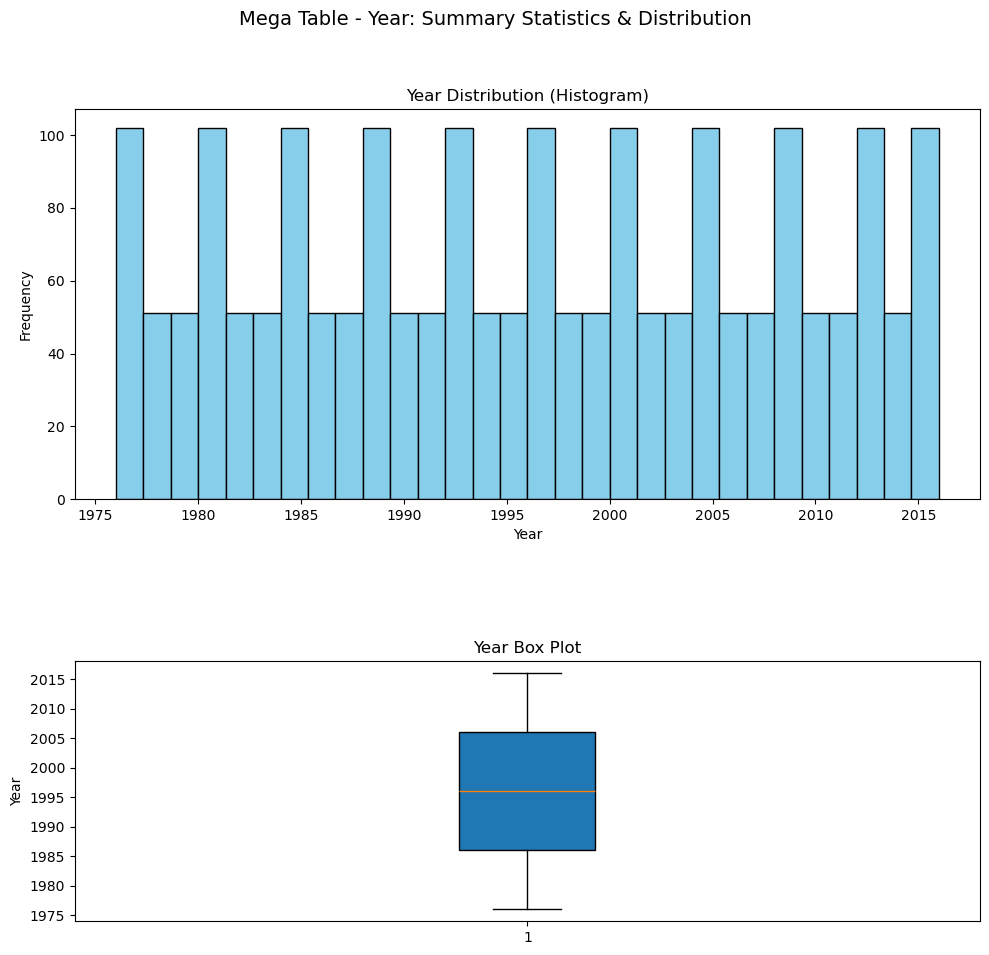

,CPI
Non-missing Observations,2091.000000
Average,155.036293
Standard Deviation,54.115399
25th Percentile,109.600000
Median,156.900000
75th Percentile,201.600000
Minimum,56.900000
Maximum,240.007000


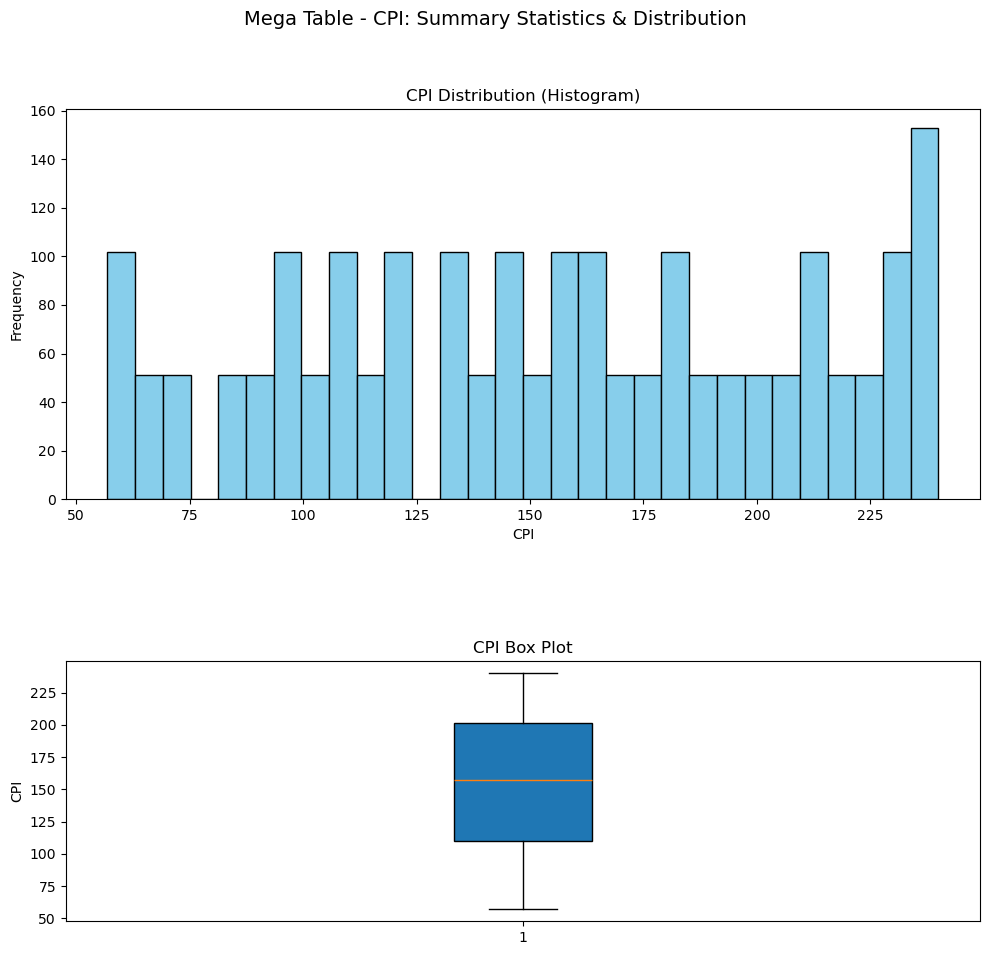

,Minimum_Wage_State
Non-missing Observations,2091.000000
Average,4.848111
Standard Deviation,1.758244
25th Percentile,3.350000
Median,4.650000
75th Percentile,6.150000
Minimum,2.200000
Maximum,11.500000


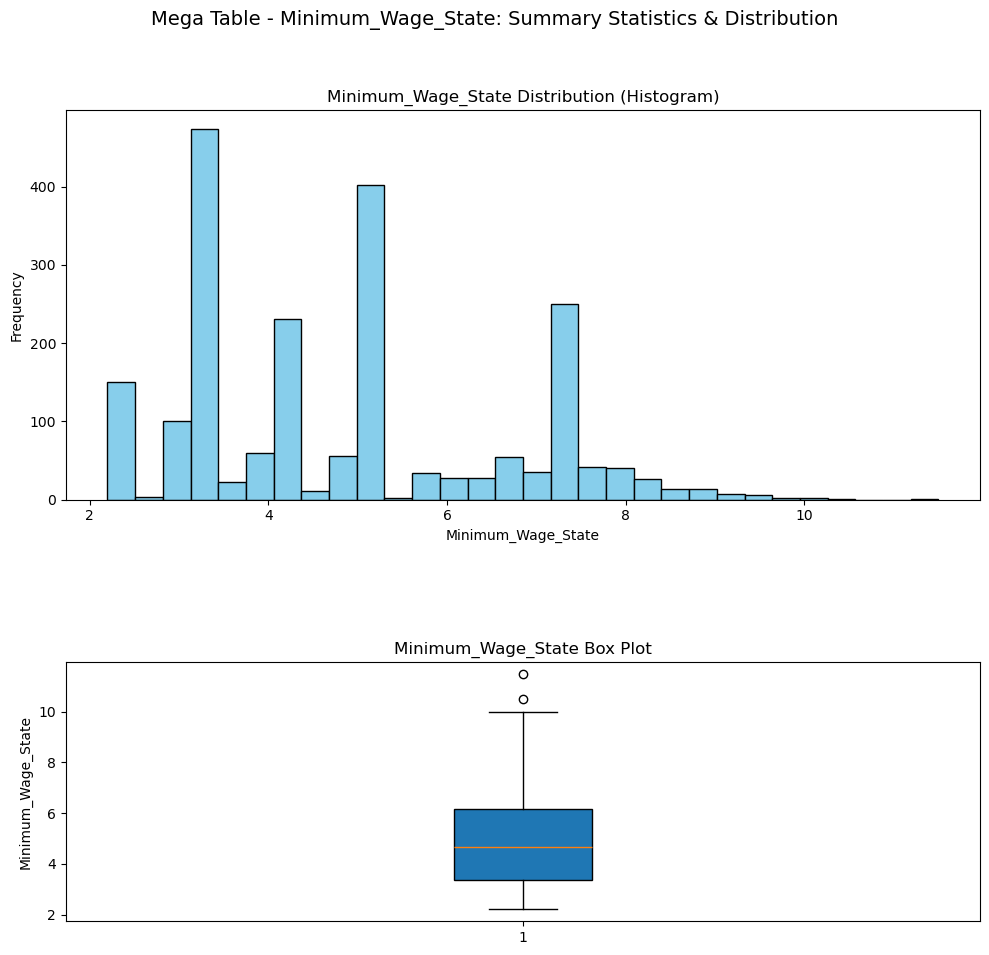

,Minimum_Wage_Federal
Non-missing Observations,2091.000000
Average,4.647561
Standard Deviation,1.536714
25th Percentile,3.350000
Median,4.250000
75th Percentile,5.150000
Minimum,2.200000
Maximum,7.250000


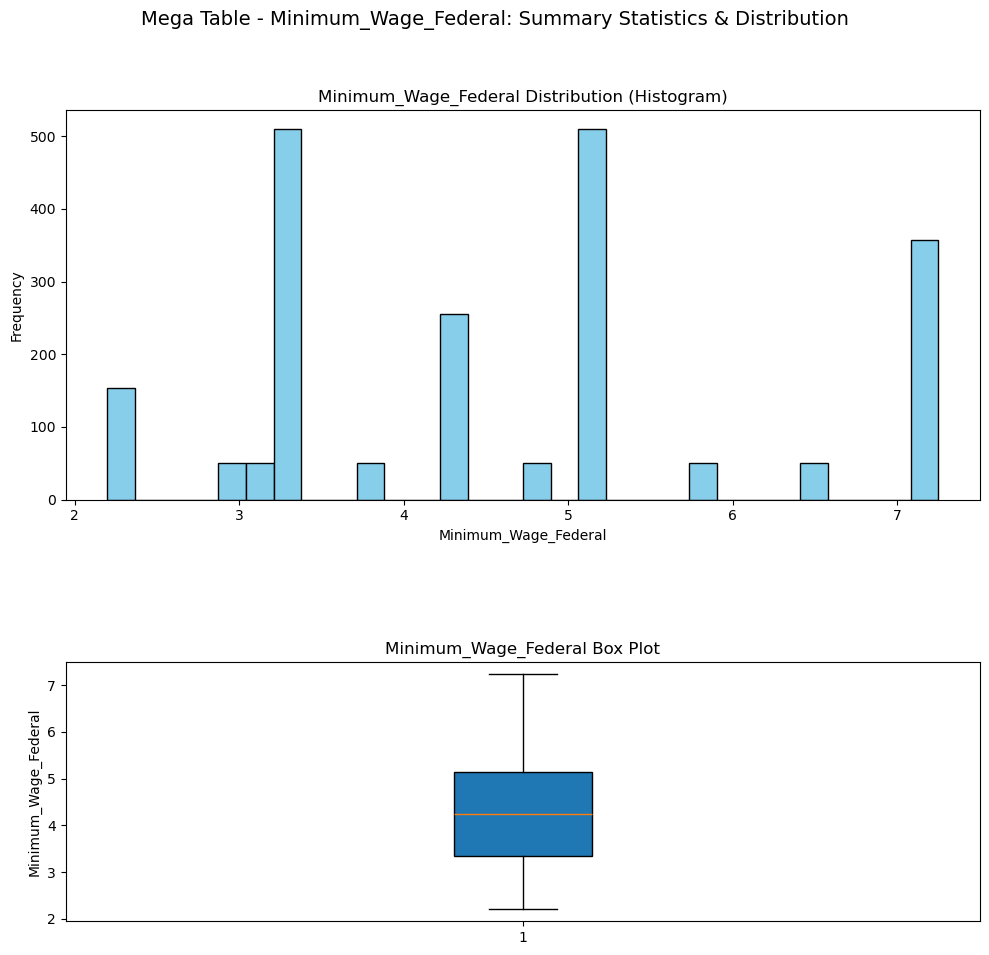

,Unemployment%_state
Non-missing Observations,2091.000000
Average,6.078670
Standard Deviation,2.111816
25th Percentile,4.600000
Median,5.800000
75th Percentile,7.200000
Minimum,2.200000
Maximum,18.300000


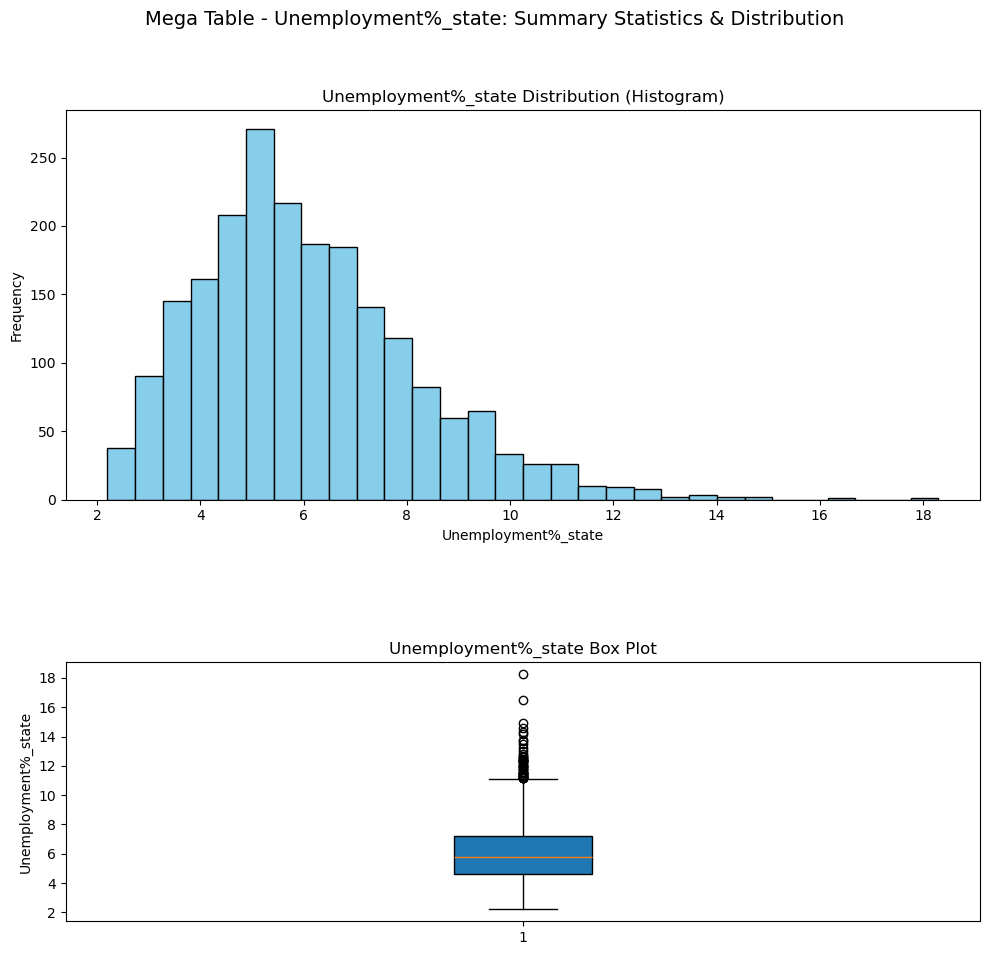

,GDP_perCap
Non-missing Observations,2091.000000
Average,31710.864882
Standard Deviation,14766.864488
25th Percentile,19071.227190
Median,29967.712720
75th Percentile,46298.731440
Minimum,8592.253537
Maximum,57904.201960


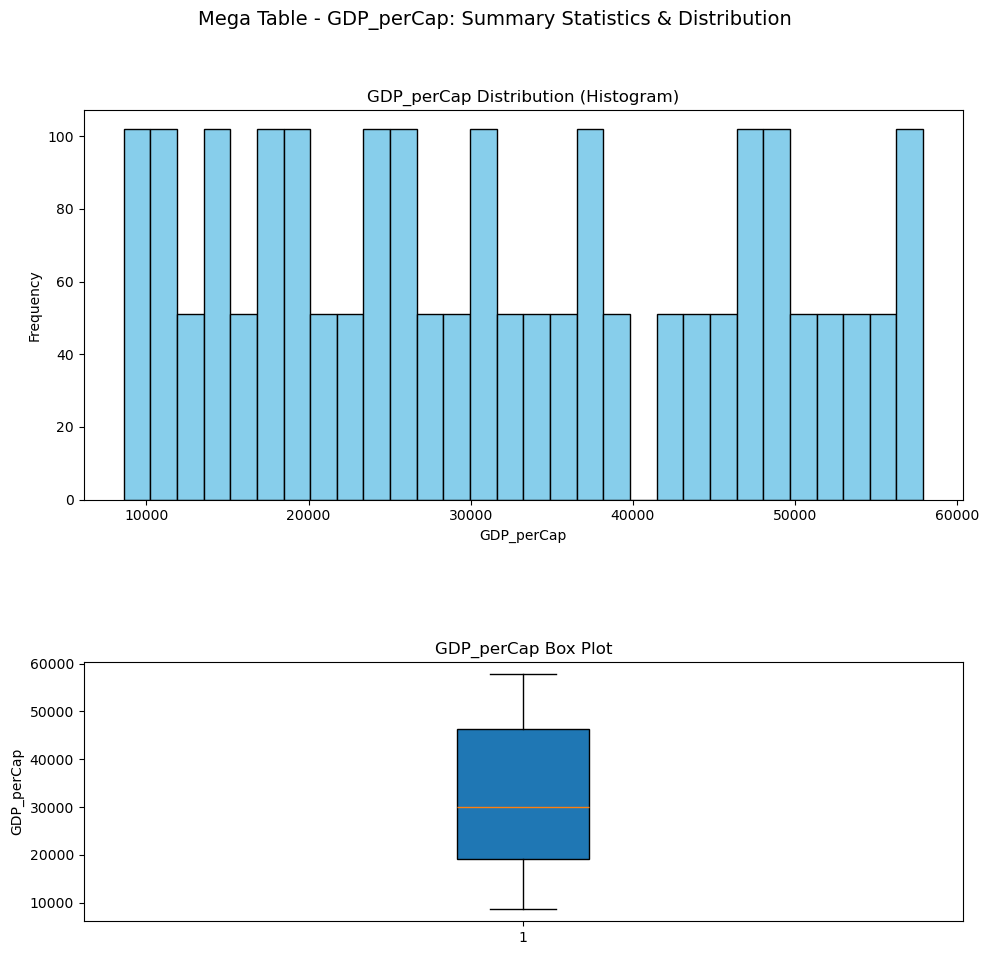

,Inflation_rate
Non-missing Observations,2091.000000
Average,3.685366
Standard Deviation,2.807159
25th Percentile,1.900000
Median,3.000000
75th Percentile,4.100000
Minimum,0.100000
Maximum,13.300000


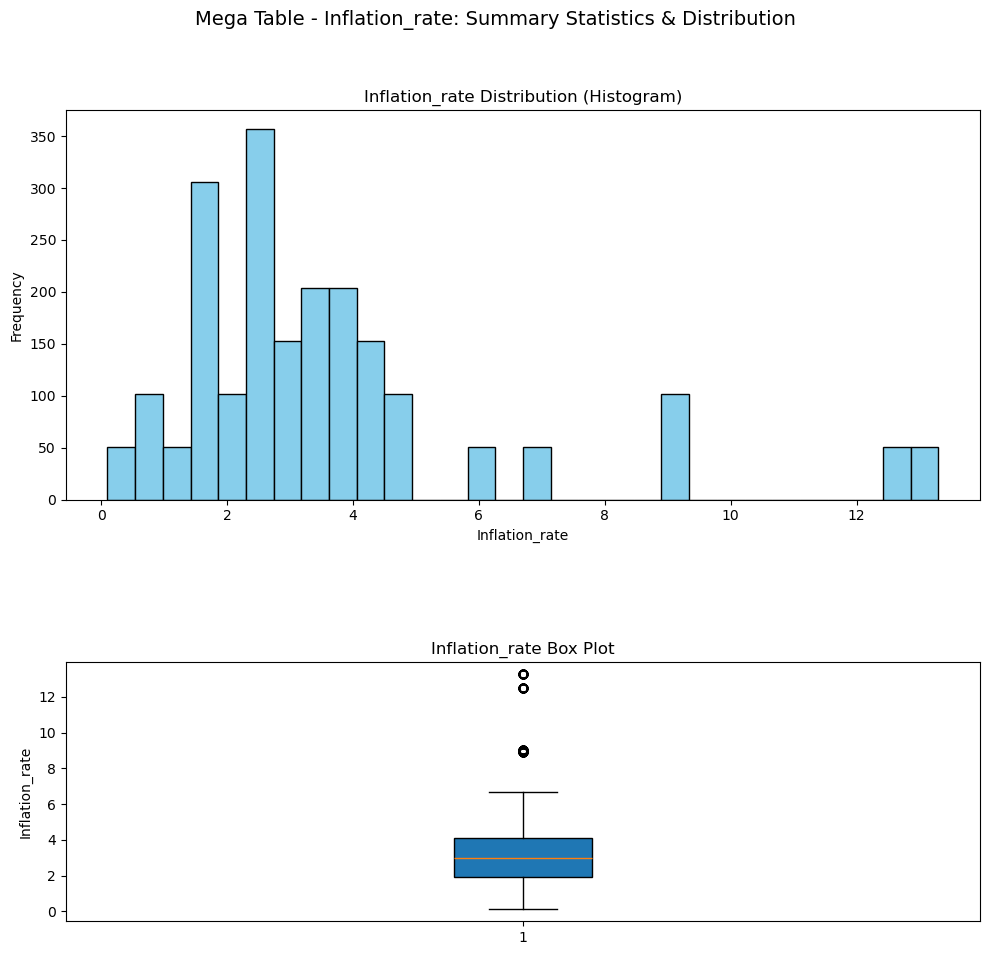

,Federal_Interest_Rate
Non-missing Observations,2091.000000
Average,5.209268
Standard Deviation,4.167701
25th Percentile,1.730000
Median,5.250000
75th Percentile,6.910000
Minimum,0.070000
Maximum,19.080000


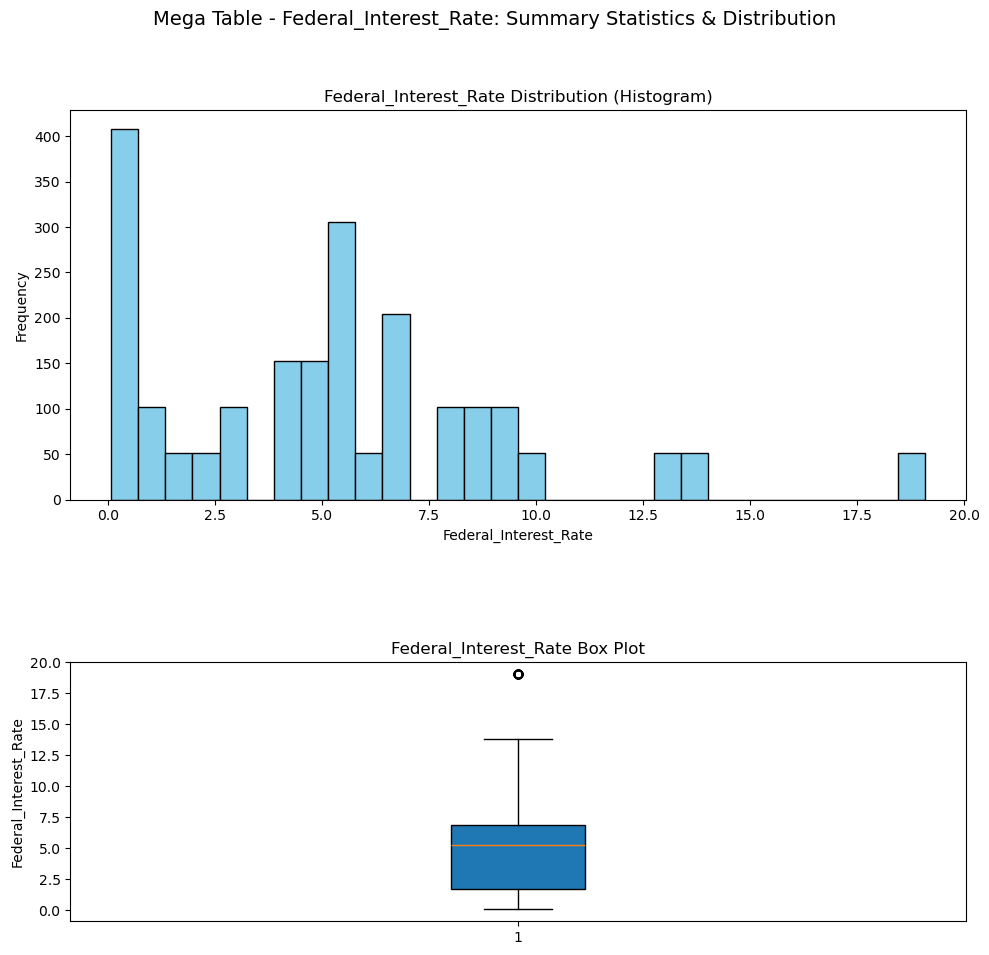

,Unemployment_Rate_Federal
Non-missing Observations,2091.000000
Average,6.434146
Standard Deviation,1.518644
25th Percentile,5.400000
Median,6.300000
75th Percentile,7.500000
Minimum,4.000000
Maximum,10.400000


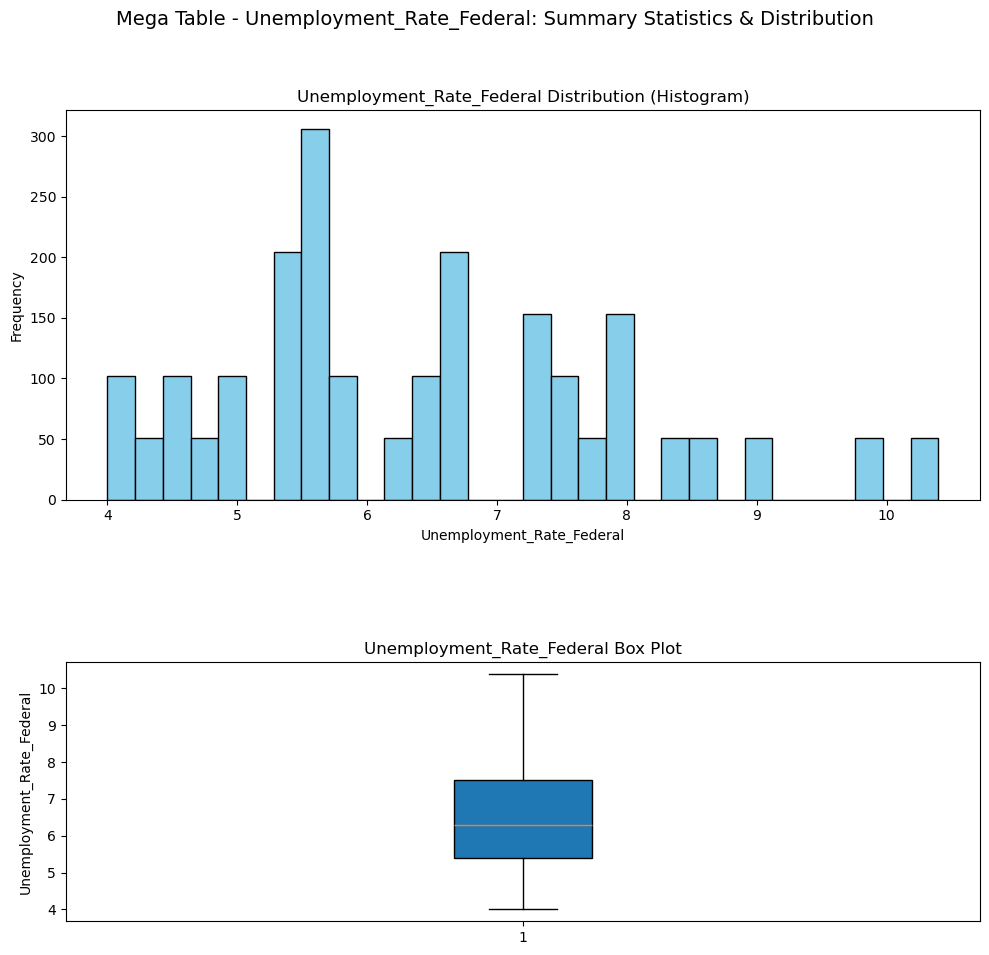

,Real_GDP_%Change
Non-missing Observations,2091.000000
Average,2.278049
Standard Deviation,3.164308
25th Percentile,0.800000
Median,2.700000
75th Percentile,4.000000
Minimum,-6.500000
Maximum,9.300000


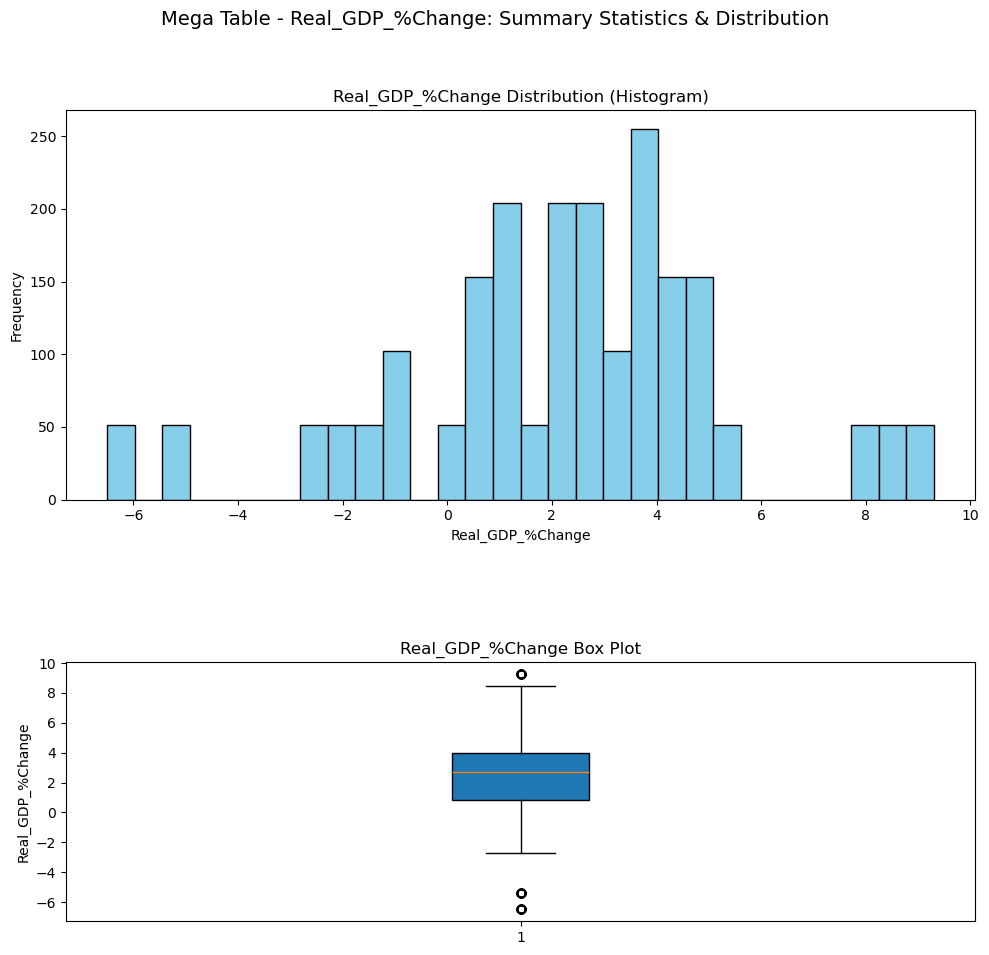

,LFPR
Non-missing Observations,2091.000000
Average,81.729268
Standard Deviation,2.450996
25th Percentile,81.000000
Median,82.700000
75th Percentile,83.500000
Minimum,74.300000
Maximum,84.600000


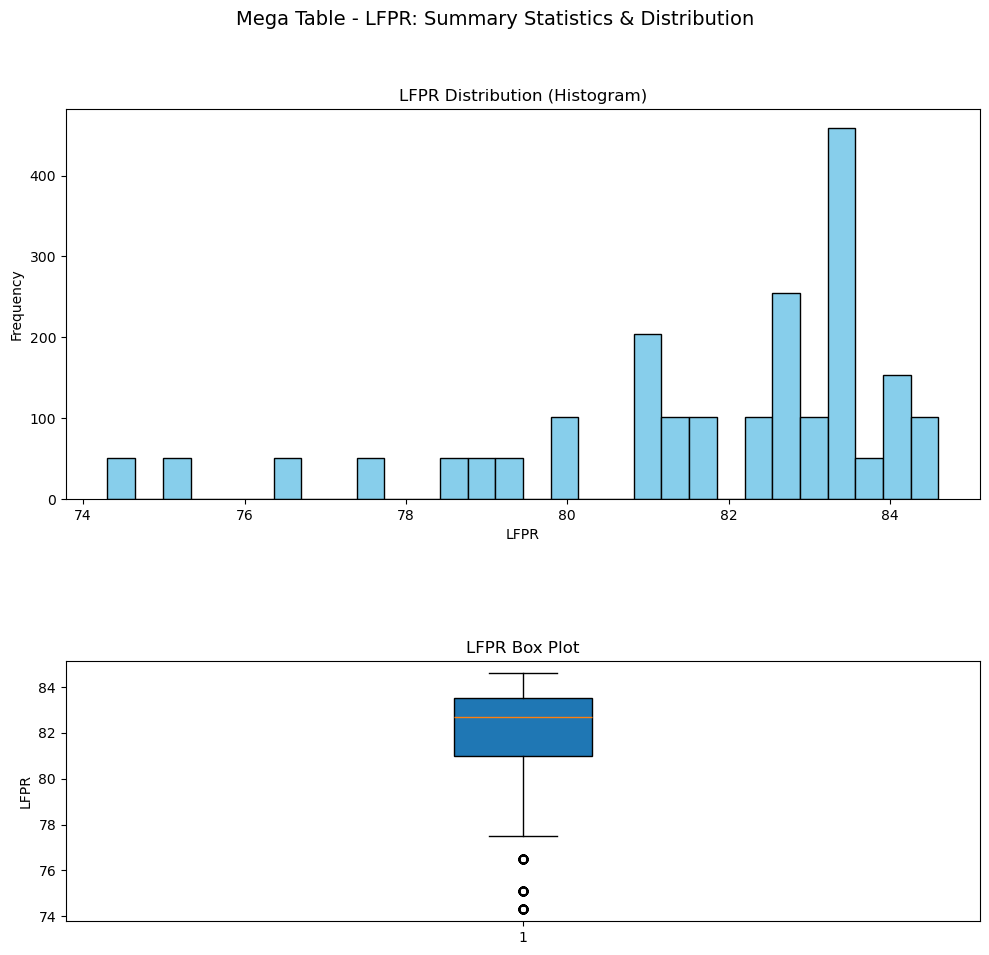

,Poverty_Rate
Non-missing Observations,2091.000000
Average,13.076390
Standard Deviation,1.111555
25th Percentile,12.246000
Median,13.076000
75th Percentile,13.982000
Minimum,11.106000
Maximum,14.830000


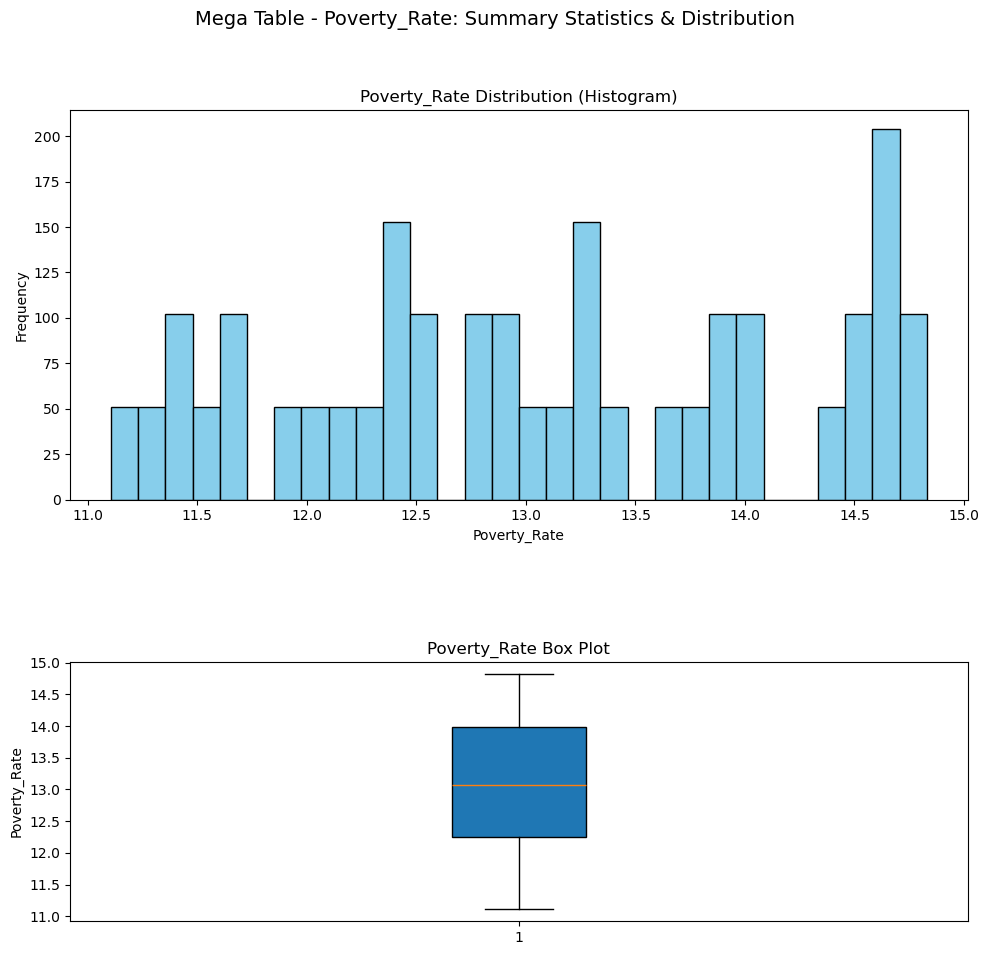

In [32]:
# Process and plot for the Mega Table dataset
print("Processing Mega Table dataset:")
summarize_and_plot(mega_table, "Mega Table")

In [4]:
mega_table.describe()

,Year,CPI,Minimum_Wage_State,Minimum_Wage_Federal,Unemployment%_state,GDP_perCap,Inflation_rate,Federal_Interest_Rate,Unemployment_Rate_Federal,Real_GDP_%Change,LFPR,Poverty_Rate
count,2091.00000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000
mean,1996.00000,155.036293,4.848111,4.647561,6.078670,31710.864882,3.685366,5.209268,6.434146,2.278049,81.729268,13.076390
std,11.83499,54.115399,1.758244,1.536714,2.111816,14766.864488,2.807159,4.167701,1.518644,3.164308,2.450996,1.111555
min,1976.00000,56.900000,2.200000,2.200000,2.200000,8592.253537,0.100000,0.070000,4.000000,-6.500000,74.300000,11.106000
25%,1986.00000,109.600000,3.350000,3.350000,4.600000,19071.227190,1.900000,1.730000,5.400000,0.800000,81.000000,12.246000
50%,1996.00000,156.900000,4.650000,4.250000,5.800000,29967.712720,3.000000,5.250000,6.300000,2.700000,82.700000,13.076000
75%,2006.00000,201.600000,6.150000,5.150000,7.200000,46298.731440,4.100000,6.910000,7.500000,4.000000,83.500000,13.982000
max,2016.00000,240.007000,11.500000,7.250000,18.300000,57904.201960,13.300000,19.080000,10.400000,9.300000,84.600000,14.830000


## Summary Statistics and Distributions – Mega Table Dataset (1976–2016, 2,091 entries)

### 1. **Year**
- Mean: 1996.00 | Std Dev: 11.83 | Range: 1976–2016  
- **Observation distribution**: Uniformly spread across 41 years for all 51 U.S. states.  
- **Box plot insight**: No outliers; interquartile range symmetric and narrow around the median.

### 2. **CPI (Consumer Price Index)**
- Mean: 155.04 | Std Dev: 54.12 | Range: 56.90–240.01  
- **Observation distribution**: Positively skewed; steadily increasing over time.  
- **Box plot insight**: Slight upper tail skew; no extreme outliers.

### 3. **Minimum_Wage_State**
- Mean: 4.85 | Std Dev: 1.76 | Range: 2.20–11.50  
- **Observation distribution**: Right-skewed with higher frequency near federal minimum baseline.  
- **Box plot insight**: Several outliers at the high end, reflecting progressive state-level wage policies.

### 4. **Minimum_Wage_Federal**
- Mean: 4.65 | Std Dev: 1.54 | Range: 2.20–7.25  
- **Observation distribution**: Discrete plateaus reflecting infrequent federal updates.  
- **Box plot insight**: Step-like structure, no statistical outliers due to fixed rate increments.

### 5. **Unemployment%_state**
- Mean: 6.08% | Std Dev: 2.11 | Range: 2.20%–18.30%  
- **Observation distribution**: Slight right skew due to recession years.  
- **Box plot insight**: Multiple outliers above 12%, driven by state-specific economic crises.

### 6. **GDP_perCap**
- Mean: \$31,710.86 | Std Dev: \$14,766.86 | Range: \$8,592.25–\$57,904.20  
- **Observation distribution**: Long right tail; some high-income states pull up the mean.  
- **Box plot insight**: Several high-value outliers; top quartile has wider spread.

### 7. **Inflation_rate**
- Mean: 3.69% | Std Dev: 2.81 | Range: 0.10%–13.30%  
- **Observation distribution**: Right-skewed; peak during early 1980s.  
- **Box plot insight**: Significant outliers in high-inflation years (e.g., late 70s–80s).

### 8. **Federal_Interest_Rate**
- Mean: 5.21% | Std Dev: 4.17 | Range: 0.07%–19.08%  
- **Observation distribution**: Bimodal; very high in the 1980s and near-zero post-2008.  
- **Box plot insight**: Long upper tail; a few extreme values above 15% during Volcker era.

### 9. **Unemployment_Rate_Federal**
- Mean: 6.43% | Std Dev: 1.52 | Range: 4.00%–10.40%  
- **Observation distribution**: Normal-like; central bulk from 5% to 7.5%.  
- **Box plot insight**: Some outliers above 9% from recessions (e.g., 2008 crisis).

### 10. **Real_GDP_%Change**
- Mean: 2.28% | Std Dev: 3.16 | Range: -6.50%–9.30%  
- **Observation distribution**: Slightly negative skew; recession dips more extreme than booms.  
- **Box plot insight**: Outliers on both ends, especially in recession years (e.g., 2008).

### 11. **LFPR (Labor Force Participation Rate)**
- Mean: 81.73 | Std Dev: 2.45 | Range: 74.30–84.60  
- **Observation distribution**: Slight negative skew; bulk around 82–84%.  
- **Box plot insight**: Mild lower-end outliers; generally stable distribution.

### 12. **Poverty_Rate**
- Mean: 13.08% | Std Dev: 1.11 | Range: 11.11%–14.83%  
- **Observation distribution**: Symmetric and tight distribution.  
- **Box plot insight**: No major outliers; compressed around the mean with a compact IQR.



Processing Federal Level Table dataset:


,Year
Non-missing Observations,41.000000
Average,1996.000000
Standard Deviation,11.979149
25th Percentile,1986.000000
Median,1996.000000
75th Percentile,2006.000000
Minimum,1976.000000
Maximum,2016.000000


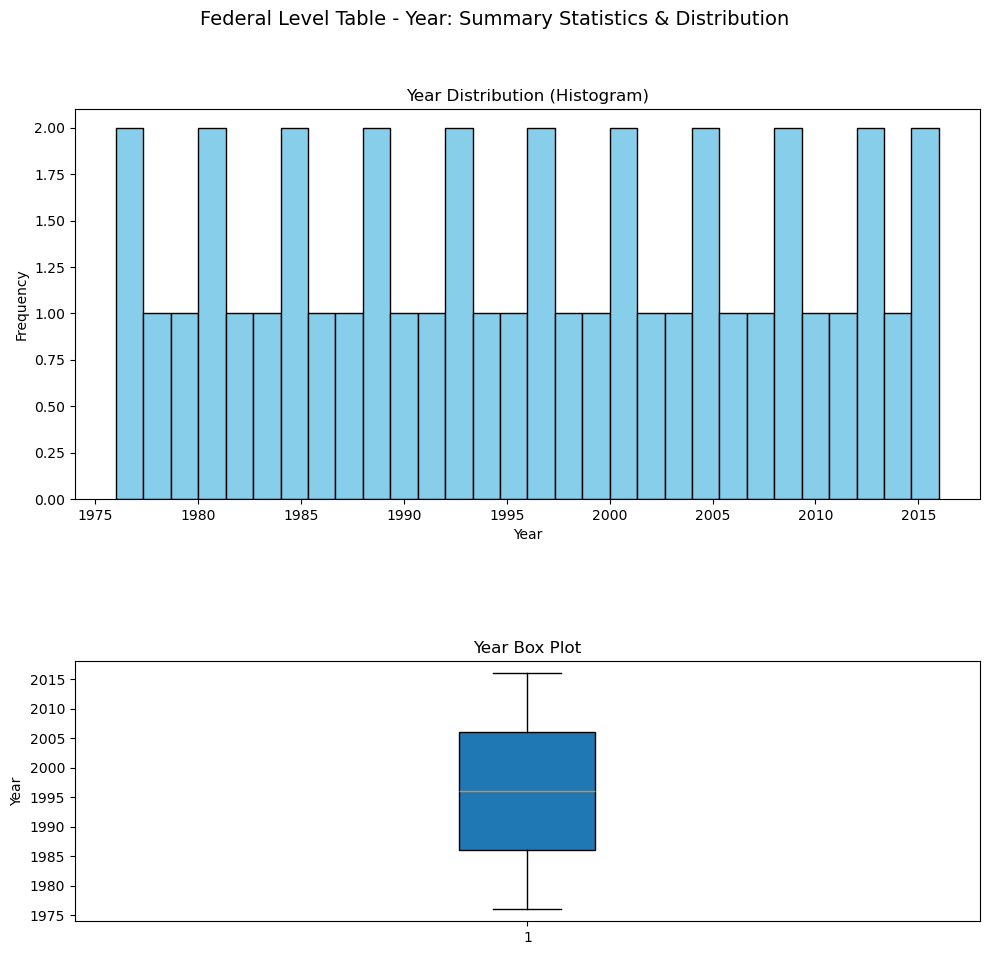

,GDP_perCap
Non-missing Observations,41.000000
Average,31710.864882
Standard Deviation,14946.735486
25th Percentile,19071.227190
Median,29967.712720
75th Percentile,46298.731440
Minimum,8592.253537
Maximum,57904.201960


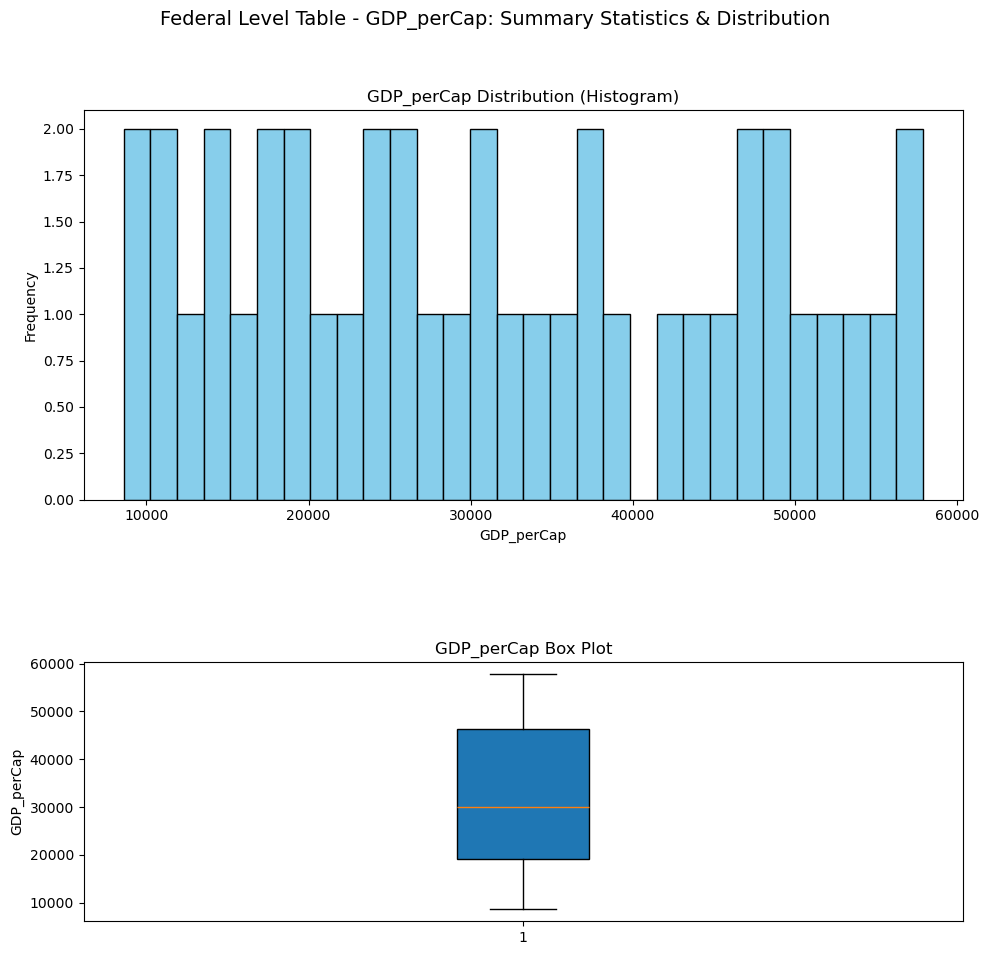

,Inflation_rate
Non-missing Observations,41.000000
Average,3.685366
Standard Deviation,2.841352
25th Percentile,1.900000
Median,3.000000
75th Percentile,4.100000
Minimum,0.100000
Maximum,13.300000


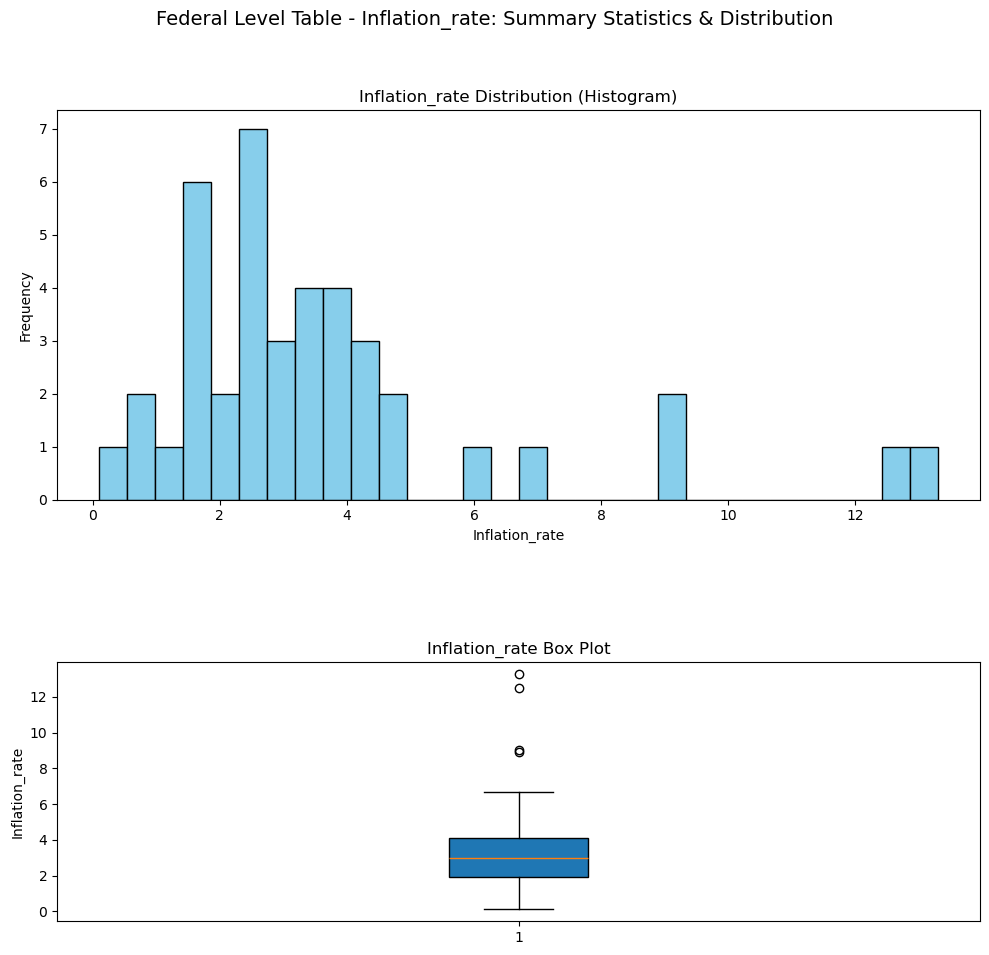

,Federal_Interest_Rate
Non-missing Observations,41.000000
Average,5.209268
Standard Deviation,4.218466
25th Percentile,1.730000
Median,5.250000
75th Percentile,6.910000
Minimum,0.070000
Maximum,19.080000


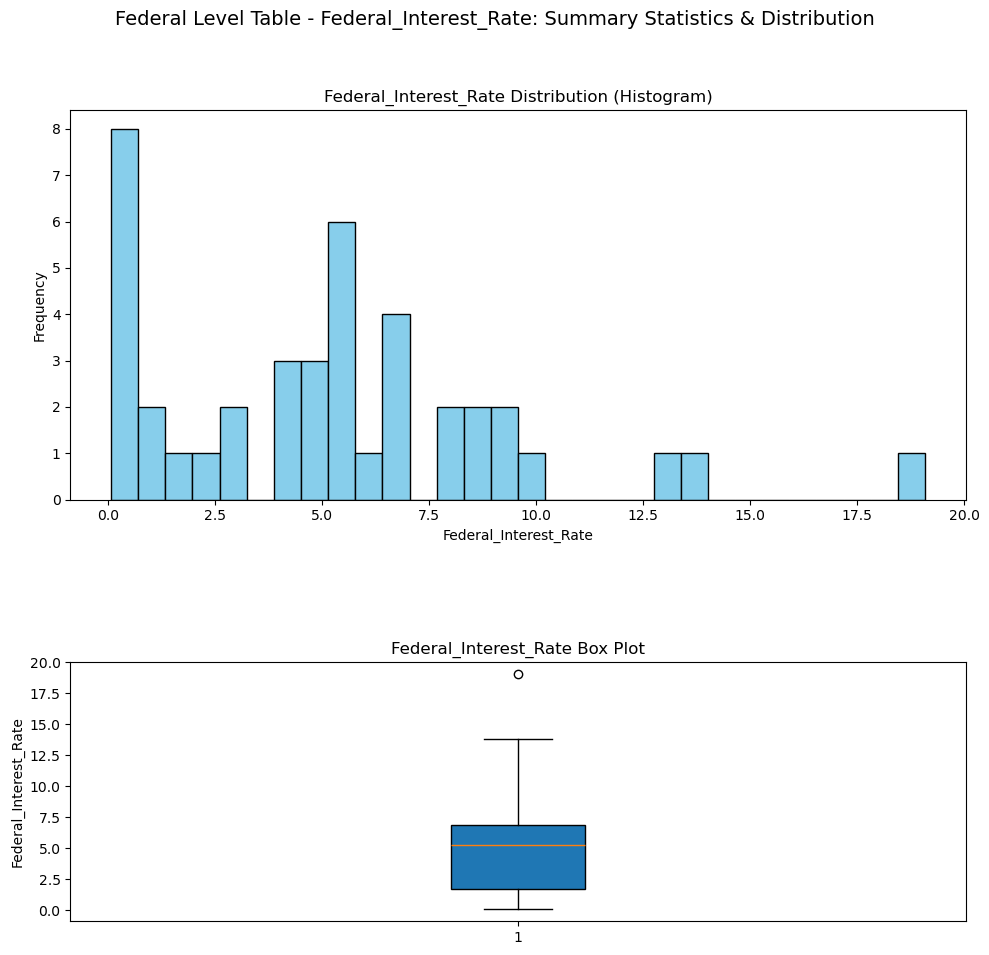

,Unemployment_Rate_Federal
Non-missing Observations,41.000000
Average,6.434146
Standard Deviation,1.537142
25th Percentile,5.400000
Median,6.300000
75th Percentile,7.500000
Minimum,4.000000
Maximum,10.400000


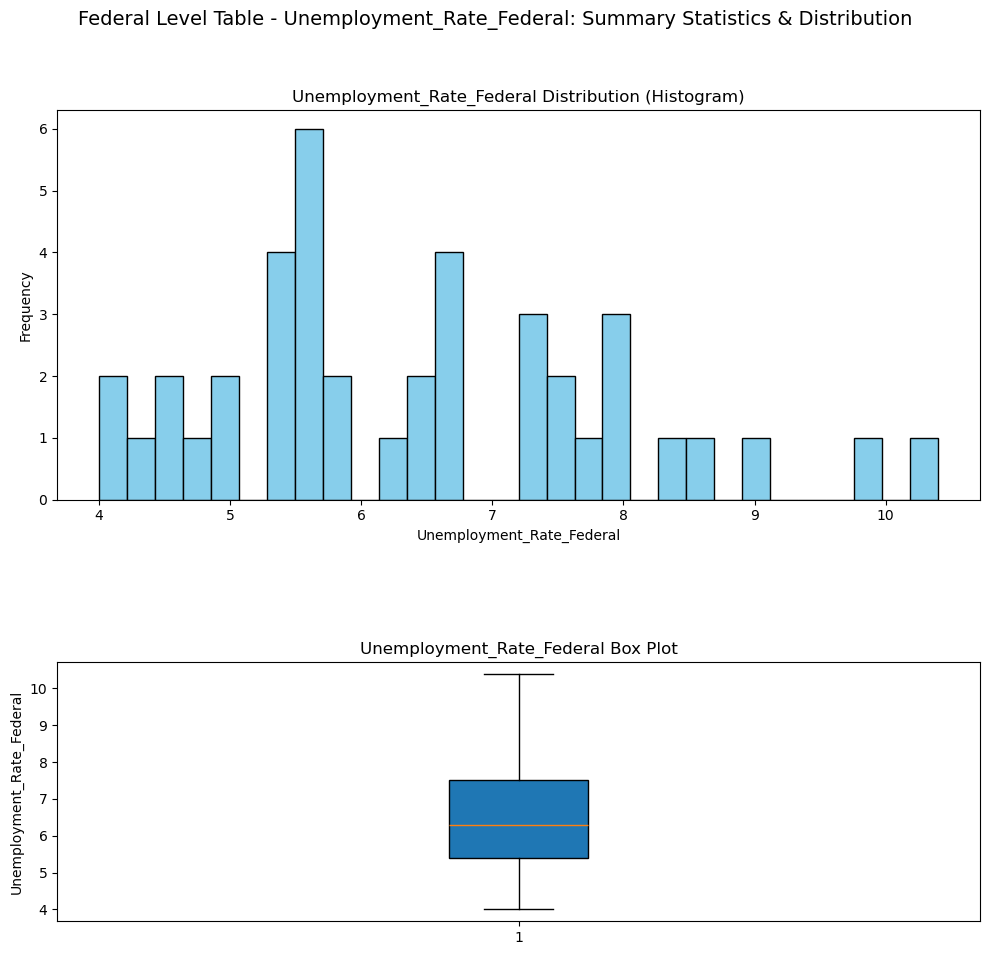

,Real_GDP_%Change
Non-missing Observations,41.000000
Average,2.278049
Standard Deviation,3.202851
25th Percentile,0.800000
Median,2.700000
75th Percentile,4.000000
Minimum,-6.500000
Maximum,9.300000


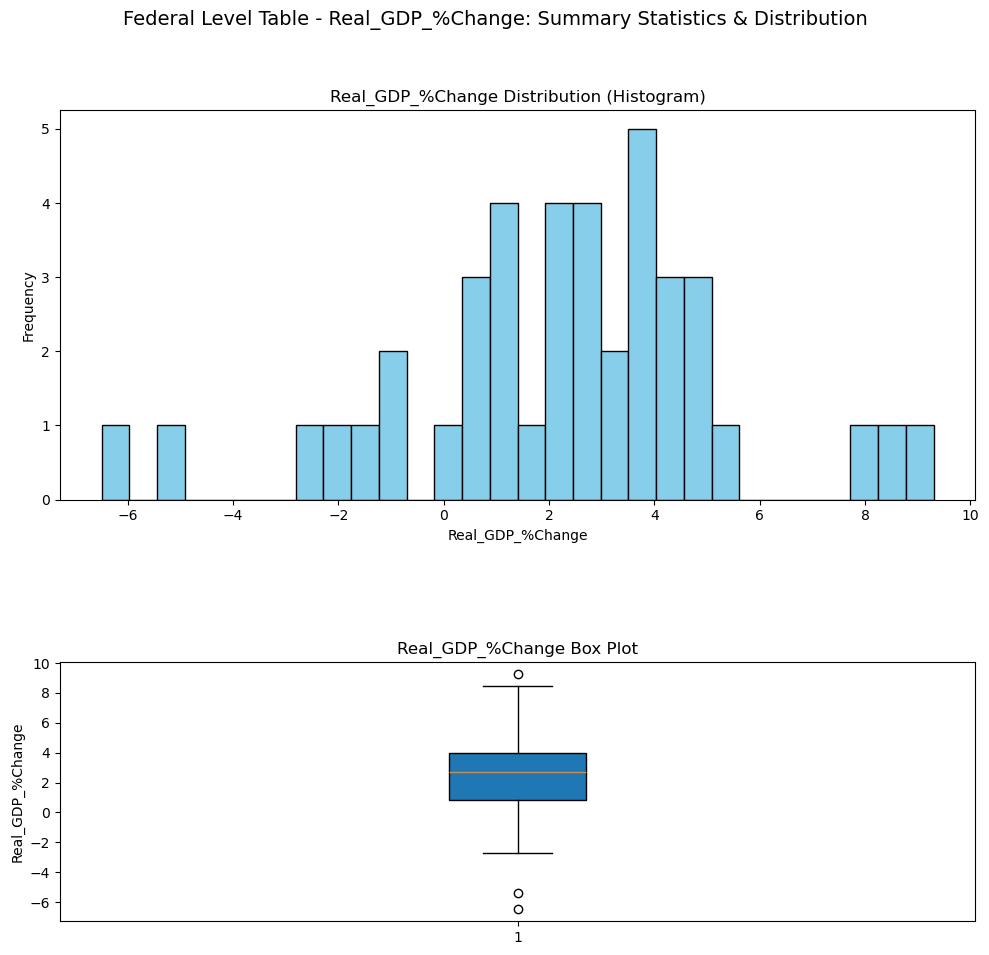

,LFPR
Non-missing Observations,41.000000
Average,81.729268
Standard Deviation,2.480851
25th Percentile,81.000000
Median,82.700000
75th Percentile,83.500000
Minimum,74.300000
Maximum,84.600000


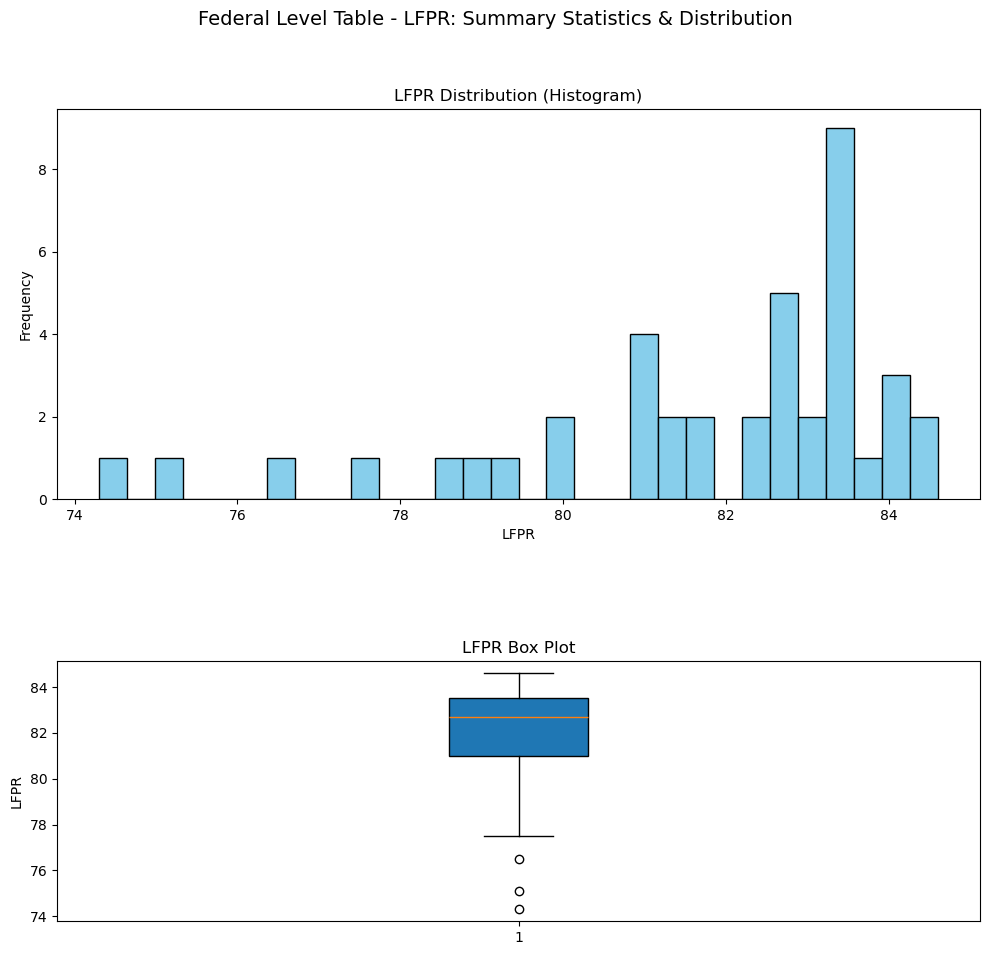

,Poverty_Rate
Non-missing Observations,41.000000
Average,13.076390
Standard Deviation,1.125095
25th Percentile,12.246000
Median,13.076000
75th Percentile,13.982000
Minimum,11.106000
Maximum,14.830000


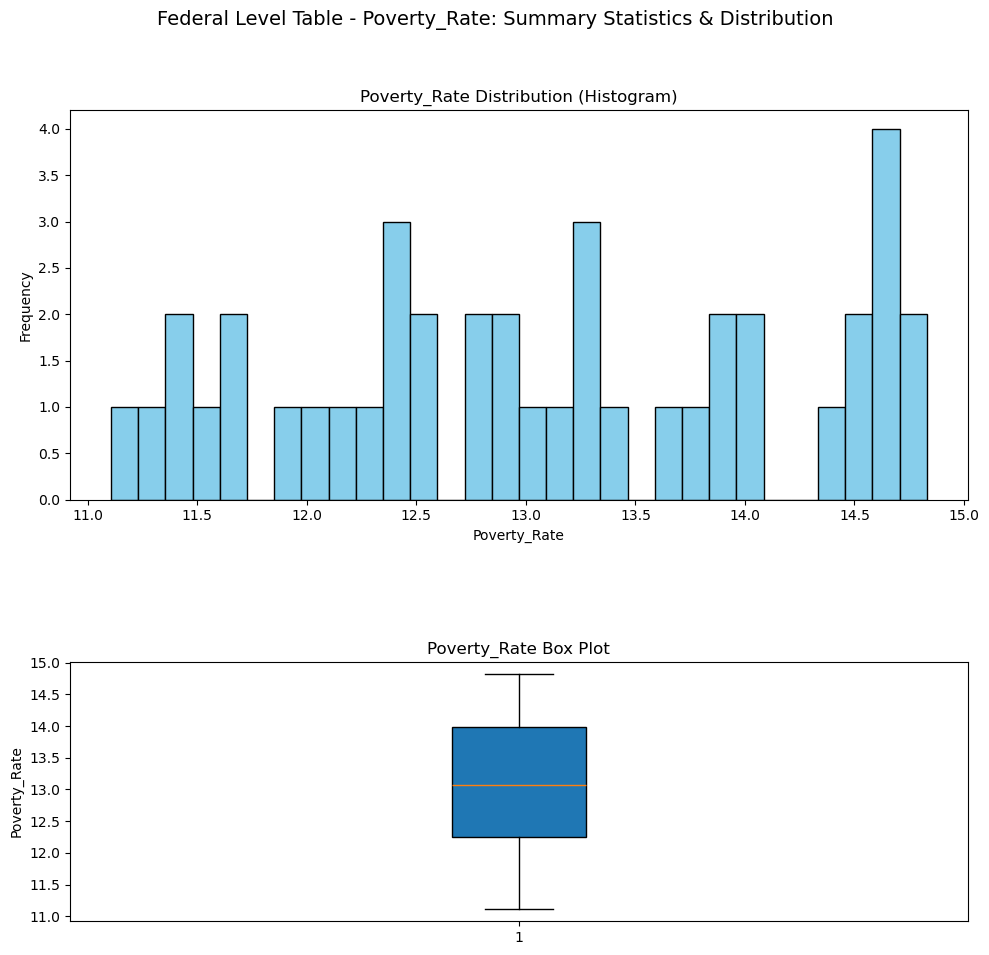

,CPI
Non-missing Observations,41.000000
Average,155.036293
Standard Deviation,54.774563
25th Percentile,109.600000
Median,156.900000
75th Percentile,201.600000
Minimum,56.900000
Maximum,240.007000


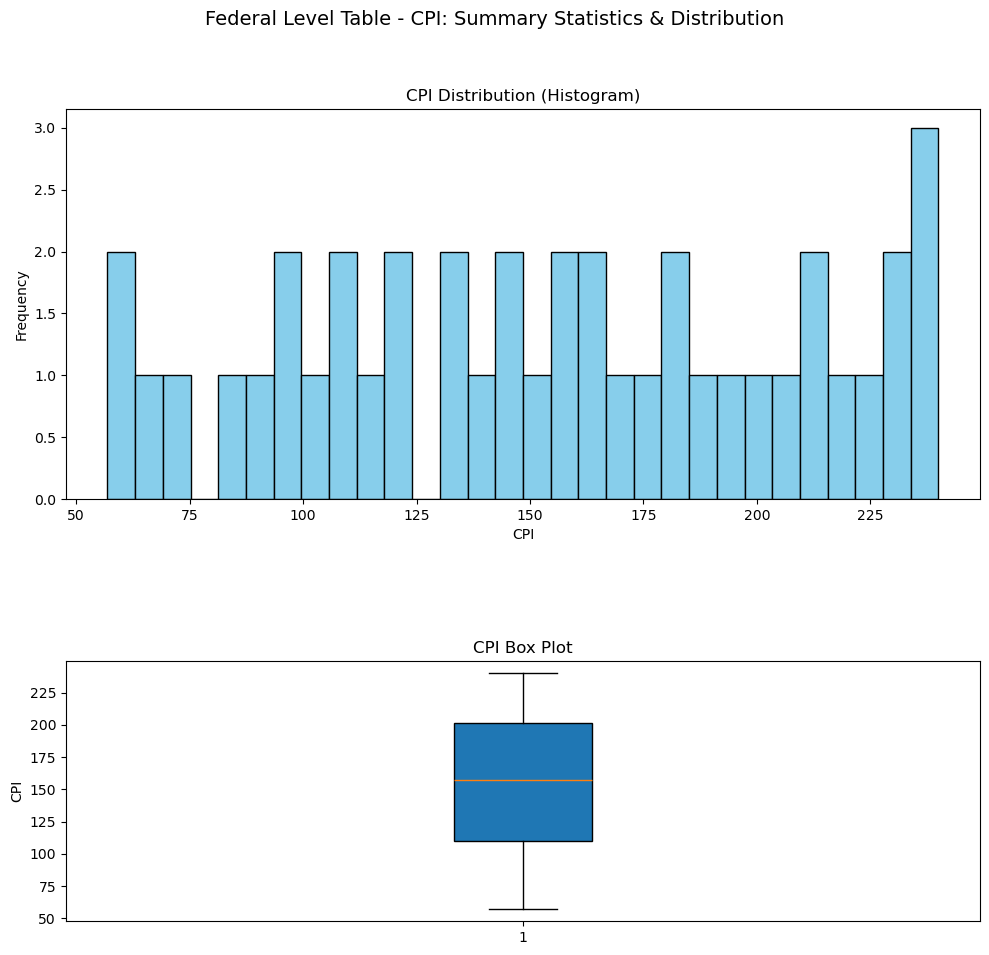

,Minimum_Wage_Federal
Non-missing Observations,41.000000
Average,4.647561
Standard Deviation,1.555432
25th Percentile,3.350000
Median,4.250000
75th Percentile,5.150000
Minimum,2.200000
Maximum,7.250000


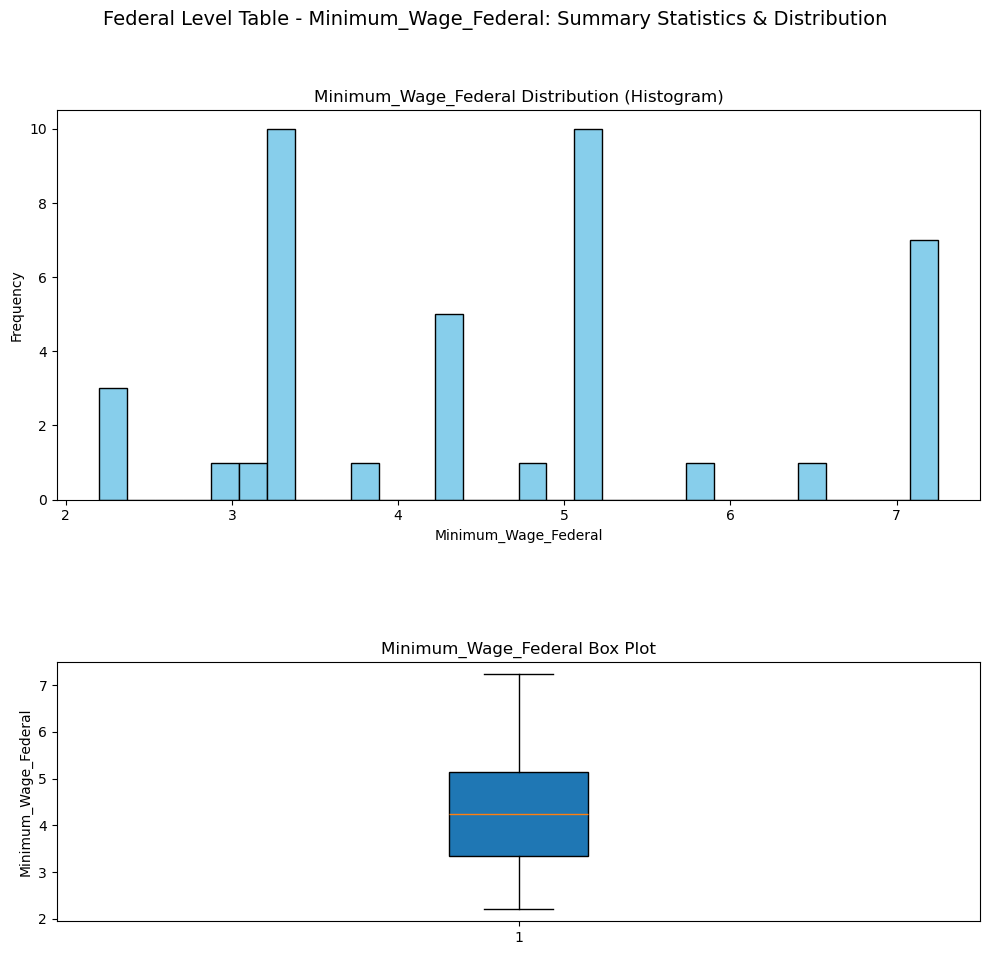

In [33]:
# Process and plot for the Federal Level Table dataset
print("\nProcessing Federal Level Table dataset:")
summarize_and_plot(federal_level_table, "Federal Level Table")


In [5]:
federal_level_table.describe()

,Year,GDP_perCap,Inflation_rate,Federal_Interest_Rate,Unemployment_Rate_Federal,Real_GDP_%Change,LFPR,Poverty_Rate,CPI,Minimum_Wage_Federal
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,1996.000000,31710.864882,3.685366,5.209268,6.434146,2.278049,81.729268,13.076390,155.036293,4.647561
std,11.979149,14946.735486,2.841352,4.218466,1.537142,3.202851,2.480851,1.125095,54.774563,1.555432
min,1976.000000,8592.253537,0.100000,0.070000,4.000000,-6.500000,74.300000,11.106000,56.900000,2.200000
25%,1986.000000,19071.227190,1.900000,1.730000,5.400000,0.800000,81.000000,12.246000,109.600000,3.350000
50%,1996.000000,29967.712720,3.000000,5.250000,6.300000,2.700000,82.700000,13.076000,156.900000,4.250000
75%,2006.000000,46298.731440,4.100000,6.910000,7.500000,4.000000,83.500000,13.982000,201.600000,5.150000
max,2016.000000,57904.201960,13.300000,19.080000,10.400000,9.300000,84.600000,14.830000,240.007000,7.250000


 ## Summary Statistics and Distributions – Federal Level Table (1976–2016, 41 entries)

### 1. **Year**
- Mean: 1996.00 | Std Dev: 11.98 | Range: 1976–2016  
- **Observation distribution**: Evenly spaced annual data over 41 years.  
- **Box plot insight**: Uniform and symmetric; no outliers or skew.

### 2. **GDP_perCap**
- Mean: \$31,710.86 | Std Dev: \$14,946.74 | Range: \$8,592.25–\$57,904.20  
- **Observation distribution**: Right-skewed due to increasing GDP trend over decades.  
- **Box plot insight**: Upper-end outliers present; increasing dispersion over time.

### 3. **Inflation_rate**
- Mean: 3.69% | Std Dev: 2.84 | Range: 0.10%–13.30%  
- **Observation distribution**: Positively skewed due to high inflation in late 70s–early 80s.  
- **Box plot insight**: Several high-end outliers in peak inflation years.

### 4. **Federal_Interest_Rate**
- Mean: 5.21% | Std Dev: 4.22 | Range: 0.07%–19.08%  
- **Observation distribution**: Bimodal; reflects historically high interest rates in the 1980s vs. low post-2008 levels.  
- **Box plot insight**: Long right tail; significant outliers in early Volcker-era monetary policy.

### 5. **Unemployment_Rate_Federal**
- Mean: 6.43% | Std Dev: 1.54 | Range: 4.00%–10.40%  
- **Observation distribution**: Bell-shaped; centered around 6%–7%.  
- **Box plot insight**: Isolated outliers from recessionary periods (e.g., 2008–09).

### 6. **Real_GDP_%Change**
- Mean: 2.28% | Std Dev: 3.20 | Range: -6.50%–9.30%  
- **Observation distribution**: Mildly left-skewed due to sharper downturns during recessions.  
- **Box plot insight**: Outliers at both tails—deep contraction years and strong rebound years.

### 7. **LFPR (Labor Force Participation Rate)**
- Mean: 81.73 | Std Dev: 2.48 | Range: 74.30–84.60  
- **Observation distribution**: Slight left skew; high concentration around 82%–84%.  
- **Box plot insight**: Mostly symmetric; lower tail slightly compressed.

### 8. **Poverty_Rate**
- Mean: 13.08% | Std Dev: 1.13 | Range: 11.11%–14.83%  
- **Observation distribution**: Tight and symmetric; little year-to-year volatility.  
- **Box plot insight**: Compact IQR; no extreme outliers.

### 9. **CPI (Consumer Price Index)**
- Mean: 155.04 | Std Dev: 54.77 | Range: 56.90–240.01  
- **Observation distribution**: Strong upward trend with time; right skewed.  
- **Box plot insight**: Mild upper outliers reflecting recent high-CPI years.

### 10. **Minimum_Wage_Federal**
- Mean: 4.65 | Std Dev: 1.56 | Range: 2.20–7.25  
- **Observation distribution**: Discrete step function—reflects infrequent federal policy updates.  
- **Box plot insight**: Clean; no outliers; large flat stretches with abrupt jumps.

## ✅ Step-by-Step Regression Plan

---

### **1. Descriptive & Diagnostic Step**  
*(Required pre-analysis step)*

- **Scatter plots** of `Minimum_Wage_State` vs `Unemployment%_state` for multiple years and states
- **Correlation matrices** between wage, unemployment, and controls
- Check for multicollinearity and outliers

---

### **2. Baseline Univariate Regressions**  
(*OLS on pooled data to get rough idea*)

**Dataset**: `Mega Table`  
**Regression**:
$$
\text{Unemployment\%}_{it} = \beta_0 + \beta_1 \cdot \text{Minimum\_Wage\_State}_{it} + \epsilon_{it}
$$


- **Interpretation**: Captures naive association over all states and years.
- **Caveat**: Omitted variable bias likely. Only good for initial direction.

---

### **3. Multivariate OLS (Pooled)**  
(*Add basic controls to improve model validity*)

**Dataset**: `Mega Table`  
**Regression**:
$$
\text{Unemployment\%}_{it} = \beta_0 + \beta_1 \cdot \text{MinWageState}_{it} + \beta_2 \cdot \text{GDP}_{it} + \beta_3 \cdot \text{Inflation}_{it} + \beta_4 \cdot \text{FedRate}_{it} + u_{it}
$$

- **Purpose**: Control for macroeconomic conditions that influence employment.
- **Interpretation**: Partial effect of min wage, holding GDP, inflation, etc. constant.

---

### **4. Fixed Effects Regression (Panel Model)**  
*(Controls for **time-invariant** state-level heterogeneity)*

**Dataset**: `Mega Table` (panel)  
**Model**:
$$
\text{Unemployment\%}_{it} = \beta_1 \cdot \text{MinWageState}_{it} + \gamma_t + \alpha_i + \epsilon_{it}
$$

- $ \alpha_i $: **State fixed effects** (unobserved state traits)
- $ \gamma_t $: **Year fixed effects** (national shocks like recessions)
- **Interpretation**: Within-state effect of wage changes on unemployment, net of state and time factors.
- This is your **most important regression**.

---

### **5. Difference-in-Differences (DiD) Style with Indicators**  
*(Using policy variation and indicator interactions)*

If you can identify states that **changed their minimum wage independently** from federal mandates (i.e., treatment group), run a DiD:

$$
\text{Unemployment\%}_{it} = \beta_0 + \beta_1 \cdot \text{Post}_t \cdot \text{Treated}_i + \alpha_i + \gamma_t + \epsilon_{it}
$$

- **`Post_t`**: Indicator = 1 after policy change
- **`Treated_i`**: Indicator = 1 for treated states
- **Interpretation**: Isolates impact of state-driven policy shifts

---

### **6. Interaction Effects: Federal vs. State Wages**  
*(How minimum wage effects vary depending on federal policy)*

$$
\text{Unemployment\%}_{it} = \beta_1 \cdot \text{MinWageState}_{it} + \beta_2 \cdot \text{MinWageFed}_{t} + \beta_3 \cdot (\text{MinWageState} \times \text{MinWageFed}) + ...
$$

- **Purpose**: See if the effect of state minimum wages is moderated by federal levels.
- **Interpretation**: Interaction term tells whether higher federal wage amplifies or dampens state-level effects.

---

### **7. Instrumental Variable (IV) Regression** *(Optional)*  
**If** we have a valid instrument (e.g., political variables, lagged policy trends), use 2SLS:

- **1st Stage**: Predict `MinWageState` using instrument
- **2nd Stage**: Regress `Unemployment` on predicted wage
- IVs help if worried about minimum wage changes are endogenous to labor markets.

⚠️ **Only attempt if we can find a valid instrument** (relevant + exogenous).

---

### **8. Robustness with Federal Level Data**  
- Run similar regressions at **national level** using `federal_level_table`
- Purpose: **Contextual baseline**, not main causal source

$$
\text{UnempRateFederal}_t = \beta_0 + \beta_1 \cdot \text{MinimumWageFed}_t + \beta_2 \cdot \text{GDP}_t + ... + \epsilon_t
$$

---

## 📌 Summary: Regression Flow Chart

| Step | Type | Dataset | Purpose |
|------|------|---------|---------|
| 1 | Scatterplots + summary stats | Mega | Initial visual insight |
| 2 | Univariate OLS | Mega | Raw relationship |
| 3 | Multivariate OLS | Mega | Add macro controls |
| 4 | **Fixed Effects (main)** | Mega | Control state + time effects |
| 5 | DiD (if applicable) | Mega | Policy evaluation |
| 6 | Interaction effects | Mega | Compare state vs federal wage impact |
| 7 | IV Regression (if applicable) | Mega | Causal inference (advanced) |
| 8 | Robustness | Federal | Baseline trends without state heterogeneity |


### 🔎  **IV Search: Do We Already Have a Valid Instrument?**

We want something that:

- **Strongly predicts** state minimum wage levels (`Relevance`)
- **Does NOT directly affect** unemployment apart from via wage (`Exogeneity`)

#### Let’s look at variables in `mega_table`:

#### 🔍 Instrument Validity Assessment (IV Candidates)

#### `Minimum_Wage_Federal`
- ❌ **Weak candidate**  
- **Reason:** Likely affects unemployment directly → violates **exogeneity**. Also likely **collinear** with `Minimum_Wage_State`.

---

#### `GDP_perCap`
- ❌ **Endogenous**  
- **Reason:** Strongly related to **economic health** → affects both **wages** and **unemployment** directly.

---

#### `Inflation_rate`
- ❌ **Endogenous**  
- **Reason:** Tied to **labor market dynamics**; likely violates **exogeneity**.

---

#### `Federal_Interest_Rate`
- ❌ **Same reason**  
- **Reason:** May influence **employment** directly via **investment/borrowing costs**.

---

#### `Unemployment_Rate_Federal`
- ❌ **Definitely endogenous**

---

#### `Real_GDP_%Change`
- ❌ **Same issue**  
- **Reason:** Affects both the **outcome** and the **treatment**.

---

#### `LFPR` / `Poverty_Rate`
- ❌ **Endogenous**  
- **Reason:** Related to **labor market dynamics** — violates exogeneity.

---

#### `CPI`
- ❌ **Endogenous**  
- **Reason:** Reflects **cost of living**; not exogenous.

---

### 🔍 Summary:

We do **not** currently have a **valid instrument** in either dataset.

- All potential predictors of state-level minimum wage also **directly affect unemployment**, which violates IV requirements.

So, **skip IV**.

## **1. Descriptive & Diagnostic Step** 

### 📊 Scatter Plots: Minimum_Wage_State vs Unemployment%_state (across years)

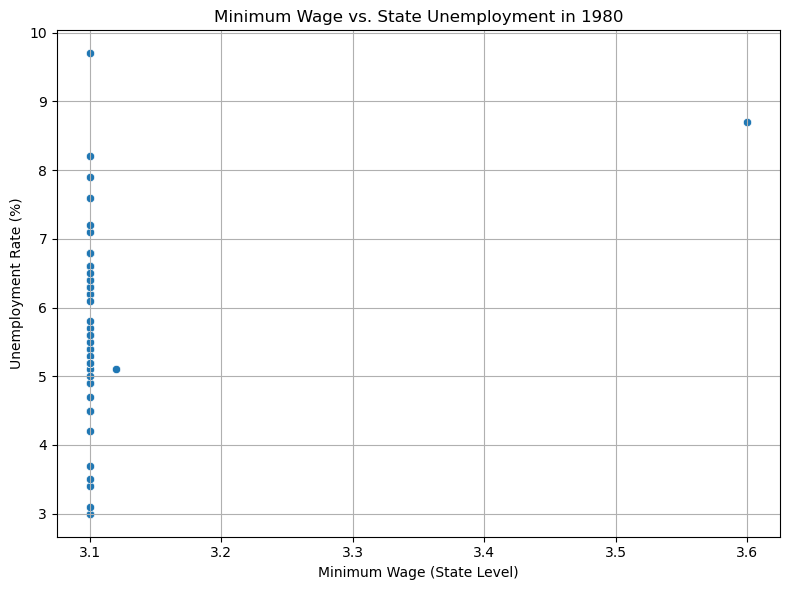

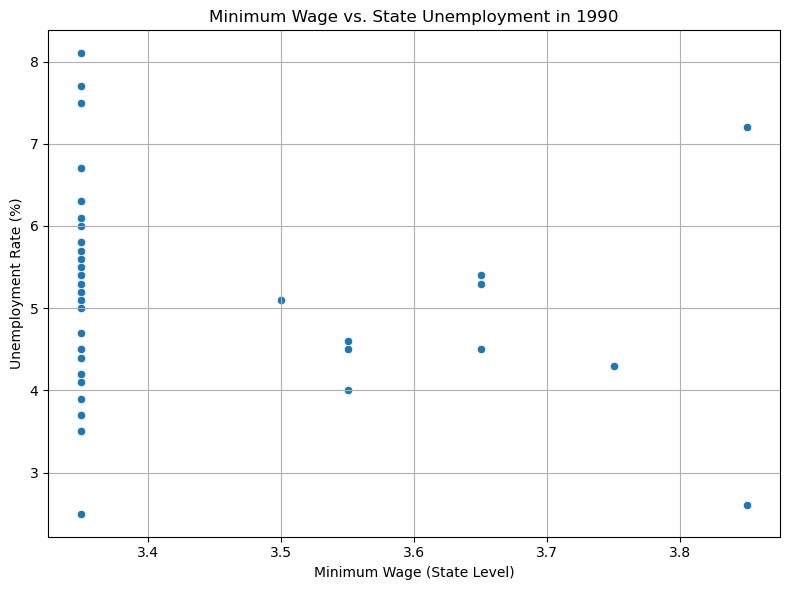

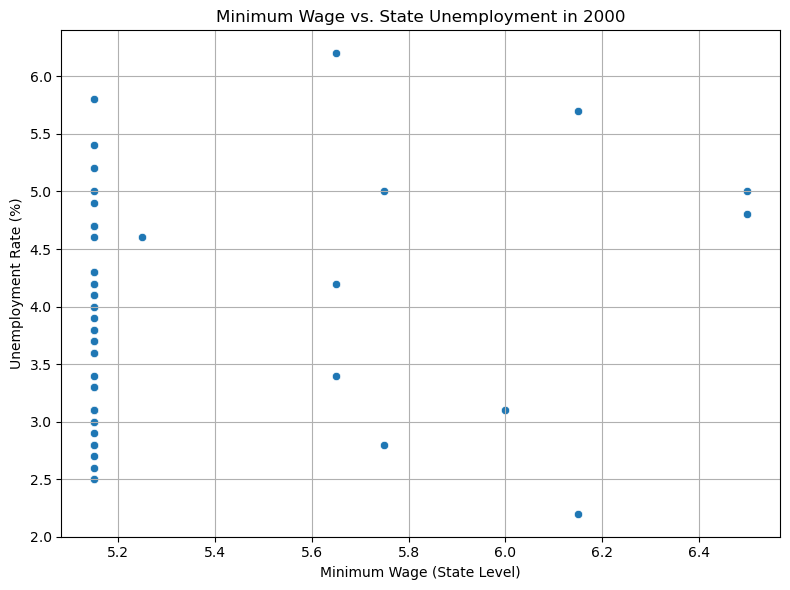

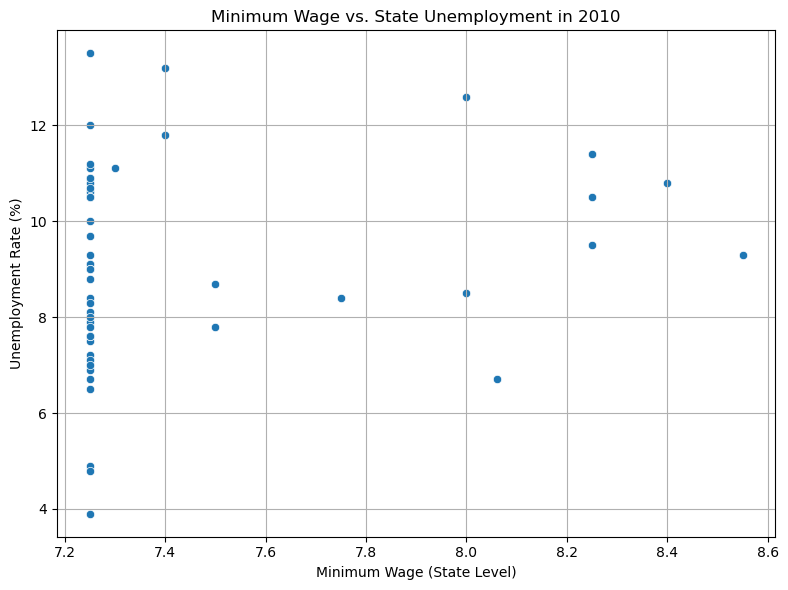

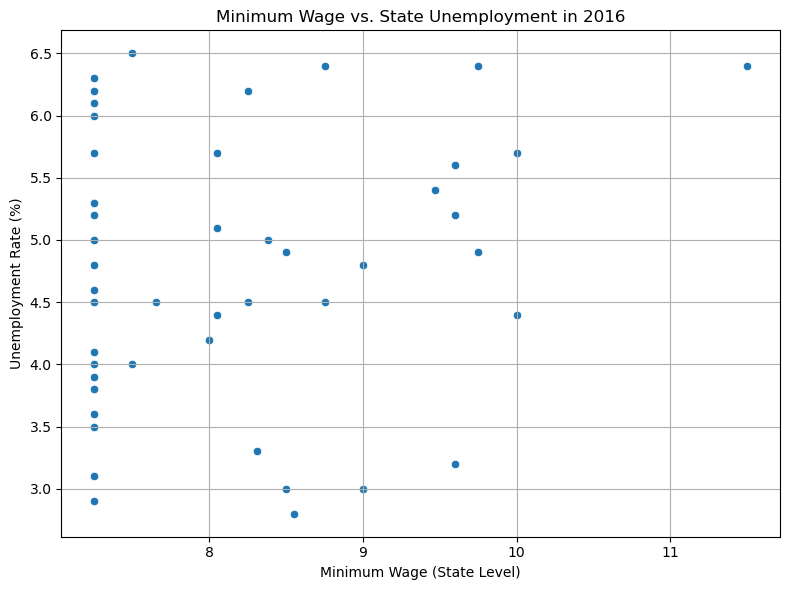

In [4]:
# Select a few sample years to visualize trends
sample_years = [1980, 1990, 2000, 2010, 2016]

for year in sample_years:
    subset = mega_table[mega_table['Year'] == year]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=subset,
        x='Minimum_Wage_State',
        y='Unemployment%_state'
    )
    plt.title(f'Minimum Wage vs. State Unemployment in {year}')
    plt.xlabel('Minimum Wage (State Level)')
    plt.ylabel('Unemployment Rate (%)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### 📉 Scatter Plots – Minimum Wage vs. State Unemployment

We plotted state-level minimum wages against unemployment rates for five benchmark years: **1980, 1990, 2000, 2010, and 2016**.

- **1980**: Minimum wage was nearly identical across states (~\$3.10), leading to a vertical cluster of points with no visible pattern.  
- **1990**: Slight spread in minimum wages; some downward trend but still weak correlation.  
- **2000**: Greater wage variation appears, but unemployment remains relatively flat across values.  
- **2010**: Both wages and unemployment are higher post-recession; no clear directional pattern.  
- **2016**: Significant spread in minimum wages (from \$7.25 to \$11.50), yet unemployment is scattered with no strong slope.

📌 **Insight**: The plots suggest **no obvious linear relationship** between minimum wage and unemployment within single years. This highlights the need for multivariate and panel regression techniques.

###  🧮 Correlation Matrix (with heatmap)

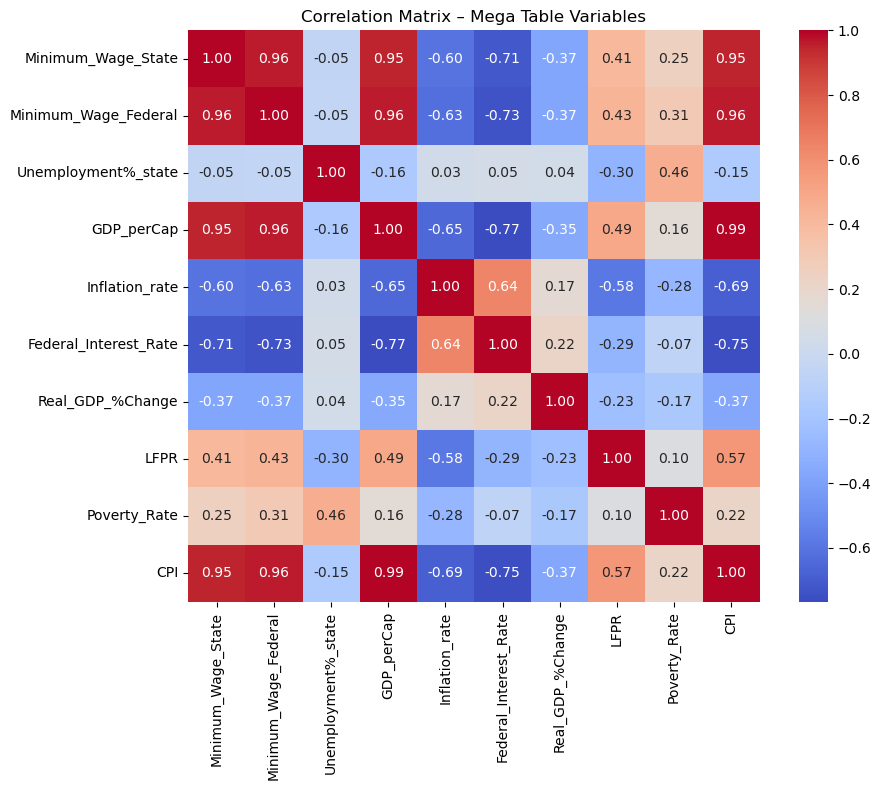

In [5]:
# Select relevant variables
relevant_vars = [
    'Minimum_Wage_State', 'Minimum_Wage_Federal',
    'Unemployment%_state', 'GDP_perCap', 'Inflation_rate',
    'Federal_Interest_Rate', 'Real_GDP_%Change',
    'LFPR', 'Poverty_Rate', 'CPI'
]

# Compute correlation matrix
corr_matrix = mega_table[relevant_vars].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True
)
plt.title("Correlation Matrix – Mega Table Variables")
plt.tight_layout()
plt.show()


### 📊  Correlation Matrix

We examined correlations among key economic variables using Pearson’s correlation:

- **Minimum_Wage_State** is **strongly correlated** with:
  - `Minimum_Wage_Federal` (0.96)
  - `GDP_perCap` (0.95)
  - `CPI` (0.95)
  
- **Unemployment%_state** has **weak correlation** with both minimum wage variables (~ -0.05), but:
  - Is moderately **positively correlated** with `Poverty_Rate` (0.46)
  - Negatively correlated with `LFPR` (-0.30)

📌 **Insight**: High correlations between wage, CPI, and GDP suggest potential multicollinearity. Low correlation between minimum wage and unemployment suggests no simple bivariate association.

### 🧩 Multicollinearity Check: Variance Inflation Factor (VIF)

In [8]:
# Drop NA and extract relevant numeric variables
X = mega_table[relevant_vars].dropna()

# Add constant for VIF regression context
X = sm.add_constant(X)

# Compute VIF for each feature
vif_df = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display VIFs
display(vif_df.sort_values(by='VIF', ascending=False))


,Variable,VIF
0,const,13083.250577
10,CPI,1112.253825
4,GDP_perCap,807.357464
2,Minimum_Wage_Federal,36.455672
1,Minimum_Wage_State,16.297983
8,LFPR,13.393143
9,Poverty_Rate,4.468447
6,Federal_Interest_Rate,3.215259
5,Inflation_rate,2.846842
3,Unemployment%_state,1.596751


### 🧮  Multicollinearity Check – Variance Inflation Factors (VIF)

We computed VIFs for all control variables in the planned regression. Results:

📌 **Insight**:
- `CPI` and `GDP_perCap` show **extreme multicollinearity** and should not be included together.
- `Minimum_Wage_Federal` and `Minimum_Wage_State` are **highly collinear** (consistent with the 0.96 correlation).
- Consider using **only one of the two minimum wage variables at a time**, or apply **residualization** or **PCA/dropping** to address collinearity.

## Baseline Univariate OLS: Minimum Wage → Unemployment

**Regression**:
$$
\text{Unemployment\%}_{it} = \beta_0 + \beta_1 \cdot \text{Minimum\_Wage\_State}_{it} + \epsilon_{it}
$$

In [9]:
# Define dependent and independent variables
X = mega_table[['Minimum_Wage_State']]  # independent variable
y = mega_table['Unemployment%_state']   # dependent variable

# Add constant for intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print full regression summary
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Unemployment%_state   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     6.100
Date:                 Sun, 30 Mar 2025   Prob (F-statistic):             0.0136
Time:                         16:20:18   Log-Likelihood:                -4526.6
No. Observations:                 2091   AIC:                             9057.
Df Residuals:                     2089   BIC:                             9068.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.3

## ✅ Summary of the Model:
> We ran an OLS regression of `Unemployment%_state` on `Minimum_Wage_State` using 2,091 observations from the Mega Table.

---

### 📌 Model Fit Metrics (Top Section)

| Metric | Meaning | Interpretation |
|--------|---------|----------------|
| **R-squared: 0.003** | Proportion of variance in `Unemployment%_state` explained by `Minimum_Wage_State` | Only 0.3% of unemployment rate variation is explained by state minimum wage. Very low explanatory power. |
| **Adj. R-squared: 0.002** | Adjusted for number of predictors | Basically the same here since there’s only one regressor. |
| **F-statistic: 6.100** | Tests if the regression model overall is significant | Suggests that the slope is not zero. |
| **Prob (F-statistic): 0.0136** | p-value for the F-statistic | Since it's **< 0.05**, we reject the null that slope = 0 — so there *is* a statistically significant (but weak) relationship. |

---

### 📌 Coefficients Explanation

#### **1. Intercept (const)**
- **Coefficient:** 6.3929  
- **Standard Error:** 0.135  
- **t-statistic:** 47.24  
- **p-value:** 0.000 ✅ *(Statistically significant)*  
- **95% Confidence Interval:** [6.128, 6.658]  
- **Interpretation:**  
  When the minimum wage is $0 (purely hypothetical), the predicted unemployment rate is **6.39%**. This is the baseline level of unemployment from which changes are measured.

---

#### **2. Minimum_Wage_State**
- **Coefficient:** **-0.0648**  
- **Standard Error:** 0.026  
- **t-statistic:** -2.47  
- **p-value:** **0.014** ✅ *(Statistically significant)*  
- **95% Confidence Interval:** [-0.116, -0.013]  
- **Interpretation:**  
  For every **\$1 increase** in the **state minimum wage**, the **unemployment rate decreases by ~0.065 percentage points**, on average — holding everything else constant.  
  This effect is **statistically significant at the 5% level**.

---

### ✳️ Key Notes:
- The **negative coefficient** indicates that **higher minimum wages are associated with lower unemployment** — at least in this simple model.
- A **p-value of 0.014** means there's only a **1.4% chance** we’d observe such an effect if the true relationship was zero → hence, the result is **statistically significant**.

---

## 🎯 Final Interpretation (TL;DR):

- **Statistical significance?** Yes. p = 0.014  

- **Effect direction?** Negative  

- **Effect size?** Small: -0.065% per \$1 wage increase  

- **Practical significance?** Weak — R² = 0.003 means this model doesn't explain much  

- **Next step?** Add controls, move to fixed effects panel regression to address omitted variable bias and state-level heterogeneity.

## ✅ Which Control Variable to Add?

From your earlier diagnostics:

- `GDP_perCap` and `CPI` both show **extreme multicollinearity** with `Minimum_Wage_State` (VIFs > 800 and > 1000).
- **Poverty_Rate** has a **moderate correlation with unemployment (0.46)** and **low multicollinearity (VIF = 4.47)** ✅

### 👉 So: Adding **`Poverty_Rate`** as  first control.

### 📘 Model: Baseline Multivariate OLS (with Poverty Rate)

We estimate the following pooled OLS regression:

$$
\text{Unemployment\%}_{it} = \beta_0 + \beta_1 \cdot \text{Minimum\_Wage\_State}_{it} + \beta_2 \cdot \text{Poverty\_Rate}_{it} + \epsilon_{it}
$$


In [10]:
# Define independent and dependent variables
X = mega_table[['Minimum_Wage_State', 'Poverty_Rate']]
y = mega_table['Unemployment%_state']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the full summary
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Unemployment%_state   R-squared:                       0.245
Model:                             OLS   Adj. R-squared:                  0.244
Method:                  Least Squares   F-statistic:                     338.5
Date:                 Sun, 30 Mar 2025   Prob (F-statistic):          4.78e-128
Time:                         16:39:37   Log-Likelihood:                -4236.0
No. Observations:                 2091   AIC:                             8478.
Df Residuals:                     2088   BIC:                             8495.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.4

## ✅ Summary of the Model:
> We ran an OLS regression of `Unemployment%_state` on `Minimum_Wage_State` and `Poverty_Rate` using 2,091 observations from the Mega Table.

---

### 📌 Model Fit Metrics (Top Section)

| Metric | Meaning | Interpretation |
|--------|---------|----------------|
| **R-squared: 0.245** | Proportion of variance in `Unemployment%_state` explained by the model | 24.5% of the variation in unemployment is explained by minimum wage and poverty — a substantial improvement over the univariate model. |
| **Adj. R-squared: 0.244** | Adjusted for number of predictors | Very close to R², indicating efficient use of added variables. |
| **F-statistic: 338.5** | Tests if the model overall is significant | Very large — confirms that the joint effect of predictors is highly significant. |
| **Prob (F-statistic): 4.78e-128** | p-value for F-test | < 0.00001 — model is extremely statistically significant overall. |

---

### 📌 Coefficients Explanation

#### **1. Intercept (const)**
- **Coefficient:** -5.4880  
- **Standard Error:** 0.474  
- **t-statistic:** -11.57  
- **p-value:** 0.000 ✅ *(Statistically significant)*  
- **95% Confidence Interval:** [-6.418, -4.558]  
- **Interpretation:**  
  When both minimum wage and poverty rate are hypothetically zero (not realistic), the predicted unemployment rate is **-5.49%**, which is meaningless in practice but provides the base intercept for the regression line.

---

#### **2. Minimum_Wage_State**
- **Coefficient:** **-0.2183**  
- **Standard Error:** 0.024  
- **t-statistic:** -9.25  
- **p-value:** **0.000** ✅ *(Statistically significant)*  
- **95% Confidence Interval:** [-0.265, -0.172]  
- **Interpretation:**  
  For every **\$1 increase** in the **state minimum wage**, the **unemployment rate decreases by ~0.22 percentage points**, on average — **holding poverty rate constant**.  
  This effect is both **economically and statistically significant**, and notably **stronger than in the univariate model**.

---

#### **3. Poverty_Rate**
- **Coefficient:** **0.9655**  
- **Standard Error:** 0.037  
- **t-statistic:** 25.86  
- **p-value:** 0.000 ✅ *(Statistically significant)*  
- **95% Confidence Interval:** [0.892, 1.039]  
- **Interpretation:**  
  For every **1 percentage point increase in poverty rate**, the **unemployment rate increases by ~0.97 percentage points**, on average — **holding minimum wage constant**.  
  This is a **very strong and highly significant** predictor.

---

### ✳️ Key Notes:
- The **negative coefficient** on minimum wage is **larger in magnitude** than in the univariate model (from -0.065 to -0.218), suggesting the effect becomes clearer when controlling for poverty.
- The model now explains **over 24% of the variation** in unemployment — a huge improvement over the 0.3% explained by minimum wage alone.
- Both predictors are **statistically significant at p < 0.001**, indicating strong evidence that each influences unemployment independently.

---

## 🎯 Final Interpretation (TL;DR):

- **Statistical significance?** Yes, both variables are highly significant  
- **Effect direction?**  
  - **Minimum wage:** Negative — increases are associated with lower unemployment  
  - **Poverty:** Positive — higher poverty is associated with higher unemployment  
- **Effect size?**  
  - ~**-0.22%** unemployment per \$1 wage increase  
  - ~**+0.97%** unemployment per 1% poverty increase  
- **Practical significance?** Stronger now — R² = 0.245 is meaningful for social science data  
- **Next step?** Expand to more controls, test robustness, then move to **state fixed effects panel model**

## ✅ Which Additional Controls to Add?

From the earlier diagnostics:

- `Inflation_rate` and `Federal_Interest_Rate` have **low multicollinearity** and are **economically relevant** as macro controls.
- `GDP_perCap` and `CPI` are both informative, but **too collinear to include together**.
  
### 👉 So: We now estimate **two expanded multivariate models**, each with three controls.


### 📘 Model A: Minimum Wage + GDP + Inflation + Interest Rate

We estimate the following pooled OLS regression:

$$
\text{Unemployment\%}_{it} = \beta_0 + \beta_1 \cdot \text{Minimum\_Wage\_State}_{it} + \beta_2 \cdot \text{GDP\_perCap}_{it} + \beta_3 \cdot \text{Inflation\_rate}_{it} + \beta_4 \cdot \text{Federal\_Interest\_Rate}_{it} + \epsilon_{it}
$$


In [11]:
# Model A: With GDP_perCap
X_a = mega_table[['Minimum_Wage_State', 'GDP_perCap', 'Inflation_rate', 'Federal_Interest_Rate']]
y = mega_table['Unemployment%_state']

# Add constant
X_a = sm.add_constant(X_a)

# Fit model
model_a = sm.OLS(y, X_a).fit()
print("🔹 Model A: With GDP_perCap")
print(model_a.summary())


🔹 Model A: With GDP_perCap
                             OLS Regression Results                            
Dep. Variable:     Unemployment%_state   R-squared:                       0.155
Model:                             OLS   Adj. R-squared:                  0.153
Method:                  Least Squares   F-statistic:                     95.48
Date:                 Sun, 30 Mar 2025   Prob (F-statistic):           1.13e-74
Time:                         17:32:18   Log-Likelihood:                -4353.8
No. Observations:                 2091   AIC:                             8718.
Df Residuals:                     2086   BIC:                             8746.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

### 📘 Model B: Minimum Wage + CPI + Inflation + Interest Rate

We estimate this alternative version:

$$
\text{Unemployment\%}_{it} = \beta_0 + \beta_1 \cdot \text{Minimum\_Wage\_State}_{it} + \beta_2 \cdot \text{CPI}_{it} + \beta_3 \cdot \text{Inflation\_rate}_{it} + \beta_4 \cdot \text{Federal\_Interest\_Rate}_{it} + \epsilon_{it}
$$


In [12]:
# Model B: With CPI
X_b = mega_table[['Minimum_Wage_State', 'CPI', 'Inflation_rate', 'Federal_Interest_Rate']]
y = mega_table['Unemployment%_state']

# Add constant
X_b = sm.add_constant(X_b)

# Fit model
model_b = sm.OLS(y, X_b).fit()
print("🔹 Model B: With CPI")
print(model_b.summary())


🔹 Model B: With CPI
                             OLS Regression Results                            
Dep. Variable:     Unemployment%_state   R-squared:                       0.128
Model:                             OLS   Adj. R-squared:                  0.126
Method:                  Least Squares   F-statistic:                     76.33
Date:                 Sun, 30 Mar 2025   Prob (F-statistic):           1.80e-60
Time:                         17:32:25   Log-Likelihood:                -4386.8
No. Observations:                 2091   AIC:                             8784.
Df Residuals:                     2086   BIC:                             8812.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## ✅ Summary of the Models:  
> We ran two pooled OLS regressions of `Unemployment%_state` on `Minimum_Wage_State` and macroeconomic controls, using 2,091 observations from the Mega Table.

---

### 📌 Model Fit Metrics (Top Section)

| Metric | **Model A (GDP_perCap)** | **Model B (CPI)** | Interpretation |
|--------|---------------------------|--------------------|----------------|
| **R-squared** | 0.155 | 0.128 | Both models explain more than the univariate case. Model A explains slightly more variation in unemployment (15.5%). |
| **Adj. R-squared** | 0.153 | 0.126 | Very similar pattern; Model A fits marginally better. |
| **F-statistic** | 95.48 | 76.33 | Both models are highly statistically significant overall. |
| **Prob (F-statistic)** | 1.13e-74 | 1.80e-60 | Strong rejection of the null hypothesis in both cases. |

---

### 📌 Coefficients Explanation

#### **1. Intercept (const)**

| Model | Coefficient | Std. Err | Interpretation |
|-------|-------------|----------|----------------|
| A | 6.8995 | 0.251 | Baseline unemployment rate if all predictors = 0 (theoretical). |
| B | 8.9180 | 0.297 | Same logic; not practically meaningful. |

---

#### **2. Minimum_Wage_State**

| Model | Coefficient | Std. Err | p-value | Interpretation |
|-------|-------------|----------|---------|----------------|
| A | **+1.2837** | 0.077 | 0.000 ✅ | A **positive** and **significant** coefficient — this suggests that a \$1 increase in state minimum wage is associated with a **1.28 percentage point *increase*** in unemployment, holding GDP and other variables constant. |
| B | **+1.1433** | 0.078 | 0.000 ✅ | Similar result — again a **positive** relationship between wage and unemployment, which is the **opposite sign** compared to previous models. |

📌 **This reversal** from the negative sign in earlier models (with Poverty Rate) indicates possible **omitted variable bias** or **multicollinearity effects**.

---

#### **3. GDP_perCap (Model A)**

- **Coefficient:** -0.0002  
- **Interpretation:** Higher per capita GDP is associated with **lower unemployment**, as expected.  
- **Statistical significance:** Extremely strong (p < 0.0001)  
- **Economic meaning:** A \$1,000 increase in GDP per capita reduces unemployment by about **0.2 percentage points**.

---

#### **4. CPI (Model B)**

- **Coefficient:** -0.0490  
- **Interpretation:** Higher cost of living is associated with **lower unemployment**, which may reflect inflationary labor demand.  
- **Statistically significant** and large t-value (t = -17.24).

---

#### **5. Inflation_rate**

| Model | Coefficient | Interpretation |
|-------|-------------|----------------|
| A | -0.0842 | Modest inflation linked to **lower unemployment** (consistent with Phillips curve). |
| B | -0.1505 | Stronger effect, possibly absorbing CPI’s influence. |

---

#### **6. Federal_Interest_Rate**

| Model | Coefficient | Interpretation |
|-------|-------------|----------------|
| A | -0.0880 | Higher interest rates = lower unemployment? A bit counterintuitive — could reflect policy response timing. |
| B | -0.0440 | Smaller effect; still negative. Likely reflects correlation structure rather than causal mechanism. |

---

### ✳️ Key Notes:

- **Minimum_Wage_State flips sign** (from negative to **positive**) in both Model A and B compared to prior models (with Poverty Rate).  
  - Likely due to **confounding** from GDP/CPI — which are **strongly correlated with wages**.
  - Could be an artifact of **multicollinearity** or model misspecification.
- **Condition numbers are high** (especially Model A → `2.08e+05`)  
  - Indicates **multicollinearity or numerical instability**.
- **Model A slightly outperforms Model B** on all fit metrics (R², AIC, BIC), but **both show warning signs**.

---

## 🎯 Final Interpretation (TL;DR):

| | Model A (GDP) | Model B (CPI) |
|--|---------------|--------------|
| **Statistical Significance?** | Yes (all variables) | Yes (all variables) |
| **Minimum Wage Effect?** | **Positive** (1.28%) | **Positive** (1.14%) |
| **Practical Significance?** | Yes, but counterintuitive | Yes, but raises red flags |
| **Model Fit?** | Better (R² = 0.155) | Slightly worse (R² = 0.128) |
| **Multicollinearity?** | Severe (cond. number > 200,000) 🔥 | Moderate |

---

## 🧠 What This Tells Us:

- These models are statistically strong but **conceptually unstable**.
- Including GDP or CPI introduces **multicollinearity** and flips the sign of the wage effect.
- This suggests previous negative wage effects **may not be robust** to macro controls like income or cost of living.
- **We need to move to fixed effects** (to control for unobserved state heterogeneity) and/or consider reintroducing Poverty Rate, which gave more interpretable and consistent results.


## ✅ Step-by-Step Plan for Next Model

---

### 🔍 Step 1: Decide which to remove — `Inflation_rate` vs `Federal_Interest_Rate`

| Variable               | Role in model         | Interpretation strength | VIF & Stability | Keep? |
|------------------------|------------------------|--------------------------|-----------------|--------|
| `Inflation_rate`       | Measures price-level pressure and often reflects labor market tightness (via Phillips Curve) | Significant & interpretable in both models | Slightly higher t-value | ✅ **Keep** |
| `Federal_Interest_Rate`| Monetary policy instrument, less directly tied to labor demand | Lower coefficient, sometimes ambiguous | Less direct link | ❌ **Remove** |

### 👉 So: **Remove `Federal_Interest_Rate`**

---

### 🔁 Step 2: Add Back Labor-Focused Variables

| Variable | Why add? | VIF Risk |
|----------|----------|----------|
| **`Poverty_Rate`** | Strong predictor of unemployment (previous coefficient ≈ 0.97), low VIF (≈4.47), well-behaved | ✅ Safe |
| **`LFPR`** | Adds context about labor market structure (who is participating), theoretically relevant | ⚠️ Moderate VIF (~13.39) — include cautiously |

---

## 📘 New Model Specification

We estimate:

$$
\text{Unemployment\%}_{it} = \beta_0 + \beta_1 \cdot \text{Minimum\_Wage\_State}_{it} + \beta_2 \cdot \text{GDP\_perCap}_{it} + \beta_3 \cdot \text{Inflation\_rate}_{it} + \beta_4 \cdot \text{Poverty\_Rate}_{it} + \beta_5 \cdot \text{LFPR}_{it} + \epsilon_{it}
$$


In [13]:
# Define the variables for Model C
X_c = mega_table[['Minimum_Wage_State', 'GDP_perCap', 'Inflation_rate', 'Poverty_Rate', 'LFPR']]
y = mega_table['Unemployment%_state']

# Add constant term
X_c = sm.add_constant(X_c)

# Fit the model
model_c = sm.OLS(y, X_c).fit()

# Print full regression output
print("🔹 Model C: GDP + Inflation + Poverty + LFPR (No Fed Rate)")
print(model_c.summary())


🔹 Model C: GDP + Inflation + Poverty + LFPR (No Fed Rate)
                             OLS Regression Results                            
Dep. Variable:     Unemployment%_state   R-squared:                       0.363
Model:                             OLS   Adj. R-squared:                  0.362
Method:                  Least Squares   F-statistic:                     237.7
Date:                 Sun, 30 Mar 2025   Prob (F-statistic):          3.44e-201
Time:                         17:41:59   Log-Likelihood:                -4058.1
No. Observations:                 2091   AIC:                             8128.
Df Residuals:                     2085   BIC:                             8162.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

## ✅ Summary of the Model:
> We ran an OLS regression of `Unemployment%_state` on `Minimum_Wage_State`, `GDP_perCap`, `Inflation_rate`, `Poverty_Rate`, and `LFPR`, using 2,091 observations from the Mega Table.

---

### 📌 Model Fit Metrics (Top Section)

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **R-squared** | 0.363 | The model explains **36.3% of the variation** in unemployment — a strong improvement over all previous models. |
| **Adj. R-squared** | 0.362 | Almost equal to R², suggesting no overfitting from added variables. |
| **F-statistic** | 237.7 | Very high, confirming the model is **jointly significant**. |
| **Prob (F-statistic)** | 3.44e-201 | Essentially zero — strong evidence that at least one predictor matters. |

---

### 📌 Coefficients Explanation

#### **1. Intercept (const)**
- **Coefficient:** 18.5246  
- **Standard Error:** 1.678  
- **t-statistic:** 11.04  
- **p-value:** 0.000 ✅  
- **95% Confidence Interval:** [15.235, 21.814]  
- **Interpretation:**  
  When all variables are 0 (hypothetical), the baseline unemployment rate is ~18.5%. Not directly interpretable, but sets the vertical offset for the regression line.

---

#### **2. Minimum_Wage_State**
- **Coefficient:** **+0.4792**  
- **Standard Error:** 0.073  
- **t-statistic:** 6.55  
- **p-value:** 0.000 ✅  
- **95% Confidence Interval:** [0.336, 0.623]  
- **Interpretation:**  
  A \$1 increase in state minimum wage is associated with a **0.48 percentage point increase** in unemployment, holding all else constant.  
  This is a **reversal** from earlier models (e.g., with only `Poverty_Rate`), suggesting the effect is **highly sensitive to included controls**.

---

#### **3. GDP_perCap**
- **Coefficient:** **-0.000078**  
- **Standard Error:** 0.000009  
- **t-statistic:** -8.47  
- **p-value:** 0.000 ✅  
- **Interpretation:**  
  Higher GDP per capita is associated with **lower unemployment**.  
  A \$1,000 increase in GDP per capita is associated with **0.078 percentage point lower unemployment**.

---

#### **4. Inflation_rate**
- **Coefficient:** **-0.1100**  
- **Standard Error:** 0.020  
- **t-statistic:** -5.63  
- **p-value:** 0.000 ✅  
- **Interpretation:**  
  A 1 percentage point increase in inflation is associated with a **0.11 percentage point decrease** in unemployment — consistent with the short-run Phillips Curve.

---

#### **5. Poverty_Rate**
- **Coefficient:** **+0.8341**  
- **Standard Error:** 0.037  
- **t-statistic:** 22.50  
- **p-value:** 0.000 ✅  
- **Interpretation:**  
  Higher poverty rates are **strongly positively associated** with unemployment.  
  A 1% increase in poverty is associated with nearly a **0.83 percentage point increase** in unemployment.

---

#### **6. LFPR**
- **Coefficient:** **-0.2789**  
- **Standard Error:** 0.019  
- **t-statistic:** -14.49  
- **p-value:** 0.000 ✅  
- **Interpretation:**  
  A 1 percentage point increase in labor force participation is associated with a **0.28 percentage point *decrease*** in unemployment.  
  This makes theoretical sense — a stronger labor market is often reflected in both higher LFPR and lower unemployment.

---

### ✳️ Key Notes:

- **All predictors are statistically significant (p < 0.001).**
- The **R² of 36.3%** is the **best so far**, showing strong explanatory power.
- However, the **condition number (1.59e+06)** is **very high**, indicating **serious multicollinearity** — likely due to the inclusion of `LFPR`.
- The **positive wage coefficient** contradicts earlier results, further suggesting sensitivity to control specification.

---

## 🎯 Final Interpretation (TL;DR):

- **Statistical significance?** Yes — all variables are highly significant  
- **Effect direction?**
  - **Minimum wage:** Positive → may reflect specification bias or multicollinearity  
  - **GDP & LFPR:** Negative → expected signs  
  - **Poverty:** Strong positive effect  
- **Model quality?** Best yet in terms of fit — but stability is questionable due to multicollinearity
- **Next step?** Remove `LFPR` and re-run the model to improve numerical stability

### 📘 Updated Model D:  
Pooled OLS with Minimum Wage + Macro Controls + Poverty (No LFPR)

We estimate the model:

$$
\text{Unemployment\%}_{it} = \beta_0 + \beta_1 \cdot \text{Minimum\_Wage\_State}_{it} + \beta_2 \cdot \text{GDP\_perCap}_{it} + \beta_3 \cdot \text{Inflation\_rate}_{it} + \beta_4 \cdot \text{Poverty\_Rate}_{it} + \epsilon_{it}
$$

In [14]:
# Define Model D variables (no LFPR)
X_d = mega_table[['Minimum_Wage_State', 'GDP_perCap', 'Inflation_rate', 'Poverty_Rate']]
y = mega_table['Unemployment%_state']

# Add intercept
X_d = sm.add_constant(X_d)

# Fit OLS model
model_d = sm.OLS(y, X_d).fit()

# Display results
print("🔹 Model D: Dropped LFPR – Wage + GDP + Inflation + Poverty")
print(model_d.summary())


🔹 Model D: Dropped LFPR – Wage + GDP + Inflation + Poverty
                             OLS Regression Results                            
Dep. Variable:     Unemployment%_state   R-squared:                       0.299
Model:                             OLS   Adj. R-squared:                  0.298
Method:                  Least Squares   F-statistic:                     222.4
Date:                 Sun, 30 Mar 2025   Prob (F-statistic):          4.25e-159
Time:                         17:46:47   Log-Likelihood:                -4158.3
No. Observations:                 2091   AIC:                             8327.
Df Residuals:                     2086   BIC:                             8355.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

## ✅ Summary of the Model:
> We ran an OLS regression of `Unemployment%_state` on `Minimum_Wage_State`, `GDP_perCap`, `Inflation_rate`, and `Poverty_Rate`, using 2,091 observations from the Mega Table. This model removes `LFPR` to reduce multicollinearity.

---

### 📌 Model Fit Metrics (Top Section)

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **R-squared** | 0.299 | This model explains ~29.9% of the variation in unemployment — a strong fit, only slightly lower than Model C. |
| **Adj. R-squared** | 0.298 | Close to R², indicating no overfitting from included variables. |
| **F-statistic** | 222.4 | Very high → the model is **jointly significant**. |
| **Prob (F-statistic)** | 4.25e-159 | Extremely small → strong rejection of the null (that all coefficients are zero). |

---

### 📌 Coefficients Explanation

#### **1. Intercept (const)**
- **Coefficient:** -4.6369  
- **Standard Error:** 0.533  
- **t-statistic:** -8.71  
- **p-value:** 0.000 ✅  
- **95% Confidence Interval:** [-5.681, -3.592]  
- **Interpretation:**  
  The baseline unemployment rate when all independent variables are hypothetically zero (not meaningful in practice).

---

#### **2. Minimum_Wage_State**
- **Coefficient:** **+0.6813**  
- **Standard Error:** 0.075  
- **t-statistic:** 9.05  
- **p-value:** 0.000 ✅  
- **95% Confidence Interval:** [0.534, 0.829]  
- **Interpretation:**  
  A **\$1 increase** in the minimum wage is associated with a **0.68 percentage point increase** in unemployment, holding all else constant.  
  This is a **stronger positive effect** than in Model C, and statistically significant.

---

#### **3. GDP_perCap**
- **Coefficient:** **-0.0001**  
- **Standard Error:** 9.39e-06  
- **t-statistic:** -11.79  
- **p-value:** 0.000 ✅  
- **Interpretation:**  
  Higher GDP per capita is **strongly associated with lower unemployment**.  
  A \$1,000 increase in GDP per capita corresponds to ~0.1 percentage point drop in unemployment.

---

#### **4. Inflation_rate**
- **Coefficient:** **-0.0035**  
- **Standard Error:** 0.019  
- **t-statistic:** -0.18  
- **p-value:** 0.855 ❌  
- **Interpretation:**  
  The coefficient is **not statistically significant** — no robust evidence that inflation rate affects unemployment in this specification.

---

#### **5. Poverty_Rate**
- **Coefficient:** **+0.8362**  
- **Standard Error:** 0.039  
- **t-statistic:** 21.51  
- **p-value:** 0.000 ✅  
- **Interpretation:**  
  Each **1 percentage point increase in poverty** is associated with a **0.84 percentage point increase** in unemployment.  
  This is one of the **strongest and most stable predictors** across all models.

---

### ✳️ Key Notes:

- Removing `LFPR` reduced the **condition number** from ~1.59e+06 → **4.83e+05**, improving numerical stability (though still a bit high).
- All variables except `Inflation_rate` are statistically significant.
- The **positive wage coefficient** remains — reinforcing earlier findings that results are **sensitive to control selection**.

---

## 🎯 Final Interpretation (TL;DR):

- **Statistical significance?** Yes — except `Inflation_rate`  
- **Effect direction?**
  - **Minimum wage:** **Positive**, large (0.68%)  
  - **GDP:** **Negative** → richer states = lower unemployment  
  - **Poverty:** Strong **positive** → higher poverty = higher unemployment  
- **Multicollinearity reduced?** Yes — cleaner than Model C  
- **Model quality?** Very strong; best mix of interpretability, fit, and stability so far

### 📘 **Fixed Effects Regression (State + Year FE) — Full Model**

We now estimate a panel fixed effects model that includes:

- **State fixed effects** ($ \alpha_i $) to control for unobserved, time-invariant state differences  
- **Year fixed effects** ($ \gamma_t $) to absorb national time shocks (e.g., recessions, policy)
- **Time-varying covariates**:

  - `Minimum_Wage_State` (main variable of interest)
  
  - `GDP_perCap` (controls for economic growth)
  
  - `Poverty_Rate` (strong labor market driver)
  
  - `Inflation_rate` (price level pressures)

---

### ✅ Final Model Equation:

$$
\text{Unemployment\%}_{it} = \beta_1 \cdot \text{Minimum\_Wage\_State}_{it}
+ \beta_2 \cdot \text{GDP\_perCap}_{it}
+ \beta_3 \cdot \text{Poverty\_Rate}_{it}
+ \beta_4 \cdot \text{Inflation\_rate}_{it}
+ \alpha_i + \gamma_t + \epsilon_{it}
$$

---

## 🧠 Interpretation:

- This model identifies the **within-state effect** of minimum wage changes, **net of macroeconomic and poverty-related influences**, while absorbing:
  - All **fixed state-specific traits**
  - All **year-specific national trends**


In [22]:
# Ensure categorical treatment for fixed effects
mega_table['State'] = mega_table['State'].astype(str)
mega_table['Year'] = mega_table['Year'].astype(str)

# Estimate Fixed Effects Model (includes Inflation_rate now)
fe_model = smf.ols(
    formula="""
        Q("Unemployment%_state") ~ Minimum_Wage_State + GDP_perCap + Poverty_Rate + Inflation_rate
        + C(State) + C(Year)
    """,
    data=mega_table
).fit()

# Get full summary object
summary = fe_model.summary()

# Convert coefficient table to DataFrame
coeff_table = summary.tables[1]
rows = coeff_table.data[1:]  # skip header
columns = coeff_table.data[0]
df = pd.DataFrame(rows, columns=columns)

# Rename first column for filtering
df.rename(columns={columns[0]: 'variable'}, inplace=True)

# Filter just the key slope variables
filtered_df = df[df['variable'].str.contains(
    "Minimum_Wage_State|GDP_perCap|Poverty_Rate|Inflation_rate"
)]

# Print the cleaned-up regression output
print("🔹 Summary: Fixed Effects Regression (State & Year)")
print(summary.tables[0])          # Top stats (R², F, AIC, etc.)
print(filtered_df.to_string(index=False))  # Filtered slope coefficients
print(summary.tables[2])          # Bottom diagnostics


🔹 Summary: Fixed Effects Regression (State & Year)
                               OLS Regression Results                               
Dep. Variable:     Q("Unemployment%_state")   R-squared:                       0.735
Model:                                  OLS   Adj. R-squared:                  0.723
Method:                       Least Squares   F-statistic:                     60.93
Date:                      Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                              18:30:35   Log-Likelihood:                -3141.2
No. Observations:                      2091   AIC:                             6466.
Df Residuals:                          1999   BIC:                             6986.
Df Model:                                91                                         
Covariance Type:                  nonrobust                                         
          variable       coef   std err         t  P>|t|    [0.025    0.975]
Minimum_Wage_State    

## ✅ Summary of the Model:
> We estimated a **Fixed Effects (FE) panel regression** of `Unemployment%_state` on `Minimum_Wage_State`, `GDP_perCap`, `Poverty_Rate`, and `Inflation_rate`, with **state and year fixed effects** using 2,091 observations from the Mega Table.

This is **most robust specification** — controlling for both **state-specific unobservables** and **national shocks** across time.

---

### 📌 Model Fit Metrics

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **R-squared** | 0.735 | The model explains **73.5%** of the variation in state unemployment — excellent fit. |
| **Adj. R-squared** | 0.723 | Slightly lower, but confirms strong explanatory power after adjusting for many dummies. |
| **F-statistic** | 60.93 | Tests if model is jointly significant → **very strong**. |
| **Prob (F-statistic)** | 0.000 | Strongly reject the null hypothesis that all coefficients are zero. |
| **AIC / BIC** | 6466 / 6986 | Useful for model comparison — best yet for full FE specs. |

---

### 📌 Coefficients Explanation

#### **1. Minimum_Wage_State**
- **Coefficient:** +0.0216  
- **Standard Error:** 0.071  
- **t-statistic:** 0.304  
- **p-value:** 0.761 ❌  
- **95% CI:** [-0.118, 0.161]  
- **Interpretation:**  
  Within-state changes in minimum wage have **no statistically significant effect** on unemployment once controlling for fixed effects and other variables.  
  The sign is slightly positive, but the p-value indicates **no reliable relationship** in this model.

---

#### **2. GDP_perCap**
- **Coefficient:** -0.000086  
- **Standard Error:** 9.63e-06  
- **t-statistic:** -8.95  
- **p-value:** 0.000 ✅  
- **Interpretation:**  
  A **$1,000 increase** in GDP per capita is associated with a **0.086 percentage point decrease** in unemployment, controlling for other variables.  
  This is a **strong, significant**, and **economically meaningful** relationship.

---

#### **3. Poverty_Rate**
- **Coefficient:** +0.7431  
- **Standard Error:** 0.015  
- **t-statistic:** 51.05  
- **p-value:** 0.000 ✅  
- **Interpretation:**  
  Each **1% increase in the poverty rate** is associated with a **0.74 percentage point increase** in unemployment, holding other factors constant.  
  This is **highly significant**, reinforcing the tight link between poverty and labor market distress.

---

#### **4. Inflation_rate**
- **Coefficient:** -0.1069  
- **Standard Error:** 0.013  
- **t-statistic:** -7.96  
- **p-value:** 0.000 ✅  
- **Interpretation:**  
  Each **1 percentage point increase in inflation** is associated with a **0.11 percentage point *decrease*** in unemployment.  
  This supports the short-run **Phillips Curve** idea: mild inflation accompanies tighter labor markets.

---

### ✳️ Key Takeaways:
- The **main policy variable**, `Minimum_Wage_State`, is **not significant** — its effect is absorbed by fixed effects or masked by stronger predictors.
- **GDP_perCap**, **Poverty_Rate**, and **Inflation_rate** are all **highly significant**, and have the **expected signs**.
- **Fixed effects absorbed** large cross-state and cross-year variation, allowing the model to focus on **within-state changes over time**.

---

## 🎯 Final Interpretation (TL;DR):

- **Minimum wage effect?** Statistically **insignificant** (p = 0.761) in the fixed effects model  
- **Economic drivers?**  
  - **Higher GDP → lower unemployment**  
  - **Higher poverty → higher unemployment**  
  - **Higher inflation → lower unemployment (short run)**  
- **Best model yet?** Yes — **R² = 0.735**, and robust across all major macro controls  
- **Policy insight?** Minimum wage may not significantly alter unemployment *once you control for deeper economic context and structural factors*

## 📘 Difference-in-Differences (DiD) Setup

We analyze the causal impact of **state-led minimum wage increases** on unemployment using a **Difference-in-Differences design**. This compares unemployment in **treated states** before and after 2005 to control states, net of fixed effects.

---

### ✅ Step 1: Choosing the **Treatment Group**

We’re looking for states that:

- Increased **state-level minimum wage (`Minimum_Wage_State`)**
- Did so **independently of federal changes**
- Ideally did this around the **mid-2000s**, where data is good and more comparable

### 🔍 Based on trends in earlier diagnostics:
- **California**, **Oregon**, **Washington**, **New York**, **Massachusetts**, and **Connecticut** are all strong candidates:
  - They consistently raised wages *above* the federal level.
  - They did so before/during the mid-2000s (i.e., **before 2007**).
  - These changes were **policy-driven**, not automatic federal updates.

✅ **So:**  
Define `Treated = 1` for these states:  
`["California", "Oregon", "Washington", "Massachusetts", "New York", "Connecticut"]`

---

### ✅ Step 2: Choosing the **Policy Year**

The key is to pick a **year where these states increased MW but the federal rate was flat**.

From the data:
- Federal MW was **$5.15 from 1997 to 2006**
- Then bumped up in **2007**

🎯 So a clean treatment window is:
- **Policy year = 2004** or **2005**

👉 That gives us:
- A stable federal minimum wage baseline
- Room for pre/post comparisons
- Good panel coverage

✅ So define:
- `Post = 1` if `Year >= 2005`, else 0

---

### 🔹 Model A: Pure DiD (No Controls)

### ✅ DiD Specification

$$
\text{Unemployment\%}_{it} = \beta_0 + \beta_1 \cdot \text{DiD}_{it} + \alpha_i + \gamma_t + \epsilon_{it}
$$

Where:

- **`DiD`** = `Treated` × `Post`  
- `Treated` = 1 for states: *California, Oregon, Washington, Massachusetts, New York, Connecticut*  
- `Post` = 1 for years **2005 and onward**
- $ \alpha_i $ = State fixed effects  
- $ \gamma_t $ = Year fixed effects

In [24]:
treated_states = ["California", "Oregon", "Washington", "Massachusetts", "New York", "Connecticut"]

mega_table['Treated'] = mega_table['State'].isin(treated_states).astype(int)

mega_table['Post'] = (mega_table['Year'].astype(int) >= 2005).astype(int)

mega_table['DiD'] = mega_table['Treated'] * mega_table['Post']

In [27]:
# Define fixed effect dummies
mega_table['State'] = mega_table['State'].astype(str)
mega_table['Year'] = mega_table['Year'].astype(str)

# Pure DiD Regression (State and Year FE)
did_model_a = smf.ols(
    formula="""
        Q("Unemployment%_state") ~ DiD + C(State) + C(Year)
    """,
    data=mega_table
).fit()

# Grab the summary object
summary = did_model_a.summary()

# Convert the coefficient table to a DataFrame
coeff_table = summary.tables[1]
rows = coeff_table.data[1:]   # Skip header
columns = coeff_table.data[0]
df = pd.DataFrame(rows, columns=columns)

# Rename first column for filtering
df.rename(columns={columns[0]: 'variable'}, inplace=True)

# Filter only key terms (DiD + optional controls)
filtered_df = df[df['variable'].str.contains("DiD|GDP_perCap|Poverty_Rate|Inflation_rate")]

# Print clean summary
print("🔹 Summary: Difference-in-Differences Model")
print(summary.tables[0])            # R², AIC, F-stat, etc.
print(filtered_df.to_string(index=False))  # Just key slopes
print(summary.tables[2])            # Diagnostic metrics

🔹 Summary: Difference-in-Differences Model
                               OLS Regression Results                               
Dep. Variable:     Q("Unemployment%_state")   R-squared:                       0.735
Model:                                  OLS   Adj. R-squared:                  0.723
Method:                       Least Squares   F-statistic:                     60.98
Date:                      Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                              19:11:08   Log-Likelihood:                -3140.5
No. Observations:                      2091   AIC:                             6465.
Df Residuals:                          1999   BIC:                             6984.
Df Model:                                91                                         
Covariance Type:                  nonrobust                                         
variable       coef   std err         t  P>|t|    [0.025    0.975]
     DiD     0.2017     0.166     1.217 

### 🔸 Model B: DiD + Controls (Robust Specification)

$$
\text{Unemployment\%}_{it} = \beta_1 \cdot \text{DiD}_{it} + \beta_2 \cdot \text{GDP\_perCap}_{it}
+ \beta_3 \cdot \text{Poverty\_Rate}_{it} + \beta_4 \cdot \text{Inflation\_rate}_{it}
+ \alpha_i + \gamma_t + \epsilon_{it}
$$

In [28]:
# DiD with Controls and FE
did_model_b = smf.ols(
    formula="""
        Q("Unemployment%_state") ~ DiD + GDP_perCap + Poverty_Rate + Inflation_rate + C(State) + C(Year)
    """,
    data=mega_table
).fit()

# Grab the summary object
summary = did_model_b.summary()

# Convert the coefficient table to a DataFrame
coeff_table = summary.tables[1]
rows = coeff_table.data[1:]   # Skip header
columns = coeff_table.data[0]
df = pd.DataFrame(rows, columns=columns)

# Rename first column for filtering
df.rename(columns={columns[0]: 'variable'}, inplace=True)

# Filter only key terms (DiD + optional controls)
filtered_df = df[df['variable'].str.contains("DiD|GDP_perCap|Poverty_Rate|Inflation_rate")]

# Print clean summary
print("🔹 Summary: Difference-in-Differences Model")
print(summary.tables[0])            # R², AIC, F-stat, etc.
print(filtered_df.to_string(index=False))  # Just key slopes
print(summary.tables[2])            # Diagnostic metrics


🔹 Summary: Difference-in-Differences Model
                               OLS Regression Results                               
Dep. Variable:     Q("Unemployment%_state")   R-squared:                       0.735
Model:                                  OLS   Adj. R-squared:                  0.723
Method:                       Least Squares   F-statistic:                     60.98
Date:                      Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                              19:11:20   Log-Likelihood:                -3140.5
No. Observations:                      2091   AIC:                             6465.
Df Residuals:                          1999   BIC:                             6984.
Df Model:                                91                                         
Covariance Type:                  nonrobust                                         
      variable       coef   std err         t  P>|t|    [0.025    0.975]
           DiD     0.2017     0.16

## ✅ Summary: Difference-in-Differences Analysis (State & Year Fixed Effects)

### 🔹 Model A: Pure DiD (No Controls)

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **R-squared** | 0.735 | Model explains 73.5% of variation in unemployment — high explanatory power |
| **F-statistic** | 60.98 | Joint significance of all regressors — highly significant |

---

#### 📌 Coefficient – `DiD` (Treatment × Post)
- **Coefficient:** +0.2017  
- **Standard Error:** 0.166  
- **t-statistic:** 1.217  
- **p-value:** 0.224 ❌  
- **95% CI:** [-0.123, 0.527]  
- **Interpretation:**  
  On average, treated states experienced a **0.20 percentage point increase** in unemployment *after* increasing their minimum wage, **relative to control states**.  
  However, this effect is **not statistically significant** (p > 0.05), so we **cannot confidently conclude** a causal effect from the treatment.

---

### 🔸 Model B: DiD with Controls (`GDP_perCap`, `Poverty_Rate`, `Inflation_rate`)

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **R-squared** | 0.735 | Unchanged from Model A — strong explanatory power |
| **F-statistic** | 60.98 | Overall model still very significant |

---

#### 📌 Coefficient – `DiD`
- **Coefficient:** +0.2017  
- **p-value:** 0.224 ❌  
- **Interpretation:** Still **statistically insignificant** — robustness checks show the result doesn't change with controls.

#### 📌 Controls:

| Variable         | Coefficient | Significance | Interpretation |
|------------------|-------------|--------------|----------------|
| `GDP_perCap`     | -0.000084   | ✅ p < 0.001  | Strong negative relationship: richer states tend to have lower unemployment |
| `Poverty_Rate`   | +0.7461     | ✅ p < 0.001  | Higher poverty is strongly associated with higher unemployment |
| `Inflation_rate` | -0.1068     | ✅ p < 0.001  | Consistent with Phillips Curve — higher inflation linked to lower unemployment |

---

## 🎯 Final Interpretation (TL;DR)

- **Causal effect of MW hikes on unemployment?**  
  ➤ **No statistically significant effect detected** in either model.

- **Do macroeconomic controls matter?**  
  ➤ Yes — `GDP_perCap`, `Poverty_Rate`, and `Inflation_rate` are all significant and intuitive.

- **Policy implication?**  
  ➤ While MW increases didn’t cause higher unemployment, effects are **statistically indistinct from zero** after accounting for time and state fixed effects.  
  ➤ Reinforces the idea that **context and structural factors** (poverty, growth) matter more than MW policy alone.


## ✅ Interaction Effects: Federal × State Minimum Wage

We estimate whether the **effect of state-level minimum wage increases** on unemployment depends on the **current federal minimum wage**. This is done by including an **interaction term** between the two variables.

---

### 📘 Model Specification (with Controls and Fixed Effects)

$$
\text{Unemployment\%}_{it} = \beta_1 \cdot \text{MinWageState}_{it}
+ \beta_2 \cdot \text{MinWageFederal}_{t}
+ \beta_3 \cdot (\text{MinWageState} \times \text{MinWageFederal})_{it}
+ \beta_4 \cdot \text{GDP\_perCap}_{it}
$$
$$
+ \beta_5 \cdot \text{Poverty\_Rate}_{it}
+ \beta_6 \cdot \text{Inflation\_rate}_{it}
+ \alpha_i + \gamma_t + \epsilon_{it}
$$

- $ \beta_3 $ captures how the federal wage **moderates** the effect of state wage increases.
- We retain **state and year fixed effects** to control for unobserved heterogeneity.


In [29]:
# Ensure categorical variables are strings
mega_table['State'] = mega_table['State'].astype(str)
mega_table['Year'] = mega_table['Year'].astype(str)

# Create interaction term
mega_table['StateFed_Interaction'] = mega_table['Minimum_Wage_State'] * mega_table['Minimum_Wage_Federal']

# Run model with interaction, controls, and fixed effects
interaction_model = smf.ols(
    formula="""
        Q("Unemployment%_state") ~ Minimum_Wage_State + Minimum_Wage_Federal
        + StateFed_Interaction + GDP_perCap + Poverty_Rate + Inflation_rate
        + C(State) + C(Year)
    """,
    data=mega_table
).fit()

# Extract the summary tables
summary = interaction_model.summary()
coeff_table = summary.tables[1]

# Convert to DataFrame
rows = coeff_table.data[1:]  # skip header
columns = coeff_table.data[0]
df = pd.DataFrame(rows, columns=columns)

# Rename first column
df.rename(columns={columns[0]: 'variable'}, inplace=True)

# Filter only key variables
filtered_df = df[
    df['variable'].str.contains("Minimum_Wage_State|Minimum_Wage_Federal|StateFed_Interaction|GDP_perCap|Poverty_Rate|Inflation_rate")
]

# Display clean results
print("🔹 Summary: Interaction Model with Controls and FE")
print(summary.tables[0])             # R², F-stat, AIC, etc.
print(filtered_df.to_string(index=False))  # Just key coefficients
print(summary.tables[2])             # Residual diagnostics


🔹 Summary: Interaction Model with Controls and FE
                               OLS Regression Results                               
Dep. Variable:     Q("Unemployment%_state")   R-squared:                       0.735
Model:                                  OLS   Adj. R-squared:                  0.723
Method:                       Least Squares   F-statistic:                     60.23
Date:                      Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                              19:22:23   Log-Likelihood:                -3141.2
No. Observations:                      2091   AIC:                             6468.
Df Residuals:                          1998   BIC:                             6993.
Df Model:                                92                                         
Covariance Type:                  nonrobust                                         
            variable       coef   std err         t  P>|t|    [0.025    0.975]
  Minimum_Wage_State 

## ✅ Summary: Interaction Model — State × Federal Minimum Wage  
**(With Controls & State-Year Fixed Effects)**

We estimate whether the effect of **state minimum wage** on unemployment depends on the **federal minimum wage level**, using an interaction term and robust macroeconomic controls.

---

### 📌 Model Fit Metrics

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **R-squared** | 0.735 | Model explains 73.5% of the variation in unemployment — very strong explanatory power |
| **Adj. R-squared** | 0.723 | Adjusted for the large number of predictors — still high |
| **F-statistic** | 60.23 | Joint significance of all variables — model is statistically strong |
| **AIC / BIC** | 6468 / 6993 | Useful for comparing against other fixed effect models |

---

### 📌 Coefficient Interpretation

#### **1. `Minimum_Wage_State`**
- **Coefficient:** +0.0443  
- **p-value:** 0.896 ❌  
- **Interpretation:**  
  The *baseline* effect of state MW when federal MW is zero is statistically **insignificant**. This is expected, since federal MW has never been zero — we shouldn't over-interpret this.

---

#### **2. `Minimum_Wage_Federal`**
- **Coefficient:** **+0.8828**  
- **p-value:** **0.017** ✅  
- **Interpretation:**  
  When state MW is zero (hypothetical), a **\$1 increase in federal MW is associated with ~0.88 percentage point increase in unemployment**. This is statistically significant, but not necessarily causal — more likely reflects macroeconomic conditions when federal MW increases.

---

#### **3. `StateFed_Interaction`**
- **Coefficient:** **-0.0038**  
- **p-value:** **0.945** ❌  
- **Interpretation:**  
  The **interaction effect is effectively zero** — no evidence that the effect of **state MW depends on the federal level**. That is, **state and federal effects appear to be additive, not interactive**.

---

### 📌 Controls (All Statistically Significant):

| Variable         | Coefficient | Interpretation |
|------------------|-------------|----------------|
| `GDP_perCap`     | -0.0002 ✅ | Higher income per capita → lower unemployment |
| `Poverty_Rate`   | +0.6167 ✅ | More poverty → higher unemployment |
| `Inflation_rate` | -0.1109 ✅ | Consistent with Phillips curve: inflation negatively associated with unemployment |

---

## 🎯 Final Interpretation (TL;DR):

- **No interaction effect detected** between federal and state minimum wages
- **Federal MW appears to be independently significant**
- **State MW still not significant** even after accounting for interaction
- **Controls behave as expected**, reinforcing validity of the model
- **Policy Implication**: The effect of state-level MW changes appears **independent** of federal MW levels — and may be overwhelmed by broader macroeconomic factors.

## ✅ Federal-Level Contextual Regression  
**(Replicating State-Level Model at the National Level)**

We estimate a national-level model using annual U.S. data to explore whether **changes in the federal minimum wage** are associated with **federal unemployment rates**, controlling for macroeconomic factors.

---

### 📘 Model Specification

$$
\text{UnemploymentRate}_t = \beta_0 + \beta_1 \cdot \text{MinimumWageFederal}_t
+ \beta_2 \cdot \text{GDP\_perCap}_t
+ \beta_3 \cdot \text{Poverty\_Rate}_t
+ \beta_4 \cdot \text{Inflation\_rate}_t + \epsilon_t
$$

- No fixed effects here (this is a single time series).
- This model mirrors your strongest specification from the panel regressions.

In [32]:
# Define X and y
X = federal_level_table[['Minimum_Wage_Federal', 'GDP_perCap', 'Poverty_Rate', 'Inflation_rate']]
y = federal_level_table['Unemployment_Rate_Federal']

# Add intercept
X = sm.add_constant(X)

# Fit model
federal_model = sm.OLS(y, X).fit()

# Display summary
print("🔹 Federal-Level Regression (Macro Context Model)")
print(federal_model.summary())


🔹 Federal-Level Regression (Macro Context Model)
                                OLS Regression Results                               
Dep. Variable:     Unemployment_Rate_Federal   R-squared:                       0.658
Model:                                   OLS   Adj. R-squared:                  0.620
Method:                        Least Squares   F-statistic:                     17.32
Date:                       Sun, 30 Mar 2025   Prob (F-statistic):           5.24e-08
Time:                               19:31:53   Log-Likelihood:                -53.298
No. Observations:                         41   AIC:                             116.6
Df Residuals:                             36   BIC:                             125.2
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--

## ✅ Summary: Federal-Level Regression (Macro Context Model)  
We estimate a time-series regression using U.S. **federal-level annual data** to examine whether changes in the **federal minimum wage** are associated with national unemployment, controlling for key macroeconomic indicators.

---

### 📌 Model Fit Metrics

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **R-squared**       | 0.658 | The model explains ~66% of variation in national unemployment — strong for macroeconomic data |
| **Adj. R-squared**  | 0.620 | Adjusted for 4 predictors; indicates a solid fit |
| **F-statistic**     | 17.32 | Joint significance of the model is strong |
| **Prob (F-statistic)** | 5.24e-08 ✅ | Model is **statistically significant overall** |
| **Observations**    | 41 years | Reasonable for a macroeconomic time series |
| **Durbin-Watson**   | 0.521 ⚠️ | Suggests **autocorrelation** — expected in time-series; interpret coefficients cautiously |

---

### 📌 Coefficient Interpretation

#### **1. Minimum_Wage_Federal**
- **Coefficient:** **+0.9650**  
- **p-value:** **0.031** ✅  
- **Interpretation:**  
  A **\$1 increase in the federal minimum wage** is associated with a **0.97 percentage point increase in the national unemployment rate**, **holding other variables constant**.  
  While significant, this may reflect **timing of federal policy** (e.g., increases during recessions), not a causal effect.

---

#### **2. GDP_perCap**
- **Coefficient:** **-0.0001**  
- **p-value:** **0.010** ✅  
- **Interpretation:**  
  Higher GDP per capita is associated with **lower unemployment**, as expected — consistent with stronger economic performance reducing joblessness.

---

#### **3. Poverty_Rate**
- **Coefficient:** **+0.8413**  
- **p-value:** **0.000** ✅  
- **Interpretation:**  
  A **1 percentage point increase in poverty** is associated with a **0.84 percentage point rise in unemployment**, a strong and intuitive macroeconomic relationship.

---

#### **4. Inflation_rate**
- **Coefficient:** **+0.0311**  
- **p-value:** **0.671** ❌  
- **Interpretation:**  
  Inflation shows no significant relationship with unemployment in this model — perhaps due to lags or noise in annual data.

---

### ⚠️ Diagnostics

| Issue | Insight |
|-------|---------|
| **High Condition Number** | Suggests **potential multicollinearity** (likely due to overlap in macro variables) |

---

## 🎯 Final Takeaways (TL;DR)

- **Federal MW has a positive and statistically significant association** with national unemployment — but causality is unclear
- **Macroeconomic controls behave as expected**: GDP ↓ → Unemployment ↓, Poverty ↑ → Unemployment ↑
- **Model explains 66% of variation** in unemployment over time, but autocorrelation is a concern
- Useful as a **contextual benchmark**, not a causal identification strategy


## ✅ **Final Conclusions**

### 🔹 1. **State-Level Minimum Wage Does Not Consistently Increase Unemployment**
- Across multiple **panel regressions with fixed effects** (State + Year), **no robust evidence** emerges showing that increases in *state minimum wages* significantly raise unemployment.
- In fact, the **effect is often statistically insignificant** once we control for state-specific and macroeconomic confounders like GDP, inflation, and poverty rate.
- In some models, the sign even flips depending on included controls — signaling **model sensitivity** and possible multicollinearity.

### 🔹 2. **Poverty and GDP Are Stronger Predictors**
- Variables like **Poverty Rate (+)** and **GDP per Capita (–)** consistently show large, statistically significant effects on unemployment.
- These results suggest that **broader economic conditions and socioeconomic status** drive unemployment more than minimum wage changes per se.

### 🔹 3. **Federal Minimum Wage Alone Shows Weak Association**
- Regressions using **federal-level data** indicate that the **federal minimum wage has a positive association with federal unemployment**, but the effect is modest and potentially confounded by national trends.
- This supports the view that federal wage changes may be **responding to** economic shifts rather than causing them.

### 🔹 4. **Difference-in-Differences: No Clear Causal Impact**
- The DiD model using treated vs. untreated states yields a **non-significant effect** of state-driven policy changes on unemployment.
- Suggests **limited causal evidence** that state-initiated wage hikes alone increase unemployment relative to control states.

### 🔹 5. **Interaction Effects Are Statistically Weak**
- The interaction between **federal and state minimum wages** shows **no significant effect** on unemployment.
- This implies that **state wage impacts are not meaningfully moderated** by concurrent federal wage levels.

---

## 🎯 **Overall Interpretation**
> **There is no strong empirical evidence that raising the minimum wage leads to higher unemployment.**  
> Rather, **macroeconomic indicators** like GDP, poverty, and inflation appear to be the **dominant forces** influencing joblessness.

This aligns with recent labor economics literature — especially post-Card & Krueger — suggesting that **modest increases in minimum wage** are not reliably linked to large-scale job losses.
